# Creación del dataset dsualmh

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum cleaner

- 7 electric space heater

- 8 electric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualmt2
convert_ualmt2('./data/ozm1/', 'dsualmh.h5','2023-06-09','2023-06-10')


**********************************************************************
**   CARGA DE LOS FICHEROS DE MEDIDAS  OBVIANDO LOS ARMONICOS PARES **
**********************************************************************

output_filename dsualmh.h5 format HDF
Path ualmt: ./data/ozm1/electricity

***********************************************************************************************
..Loading file    1 .csv
Filename  ./data/ozm1/electricity\1.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.686296e+12  20.0671 -5.03741  20.689735  49.9827  249.569  0.637181   
1      1.686296e+12  19.1541 -4.62669  19.704964  49.9829  249.532  0.626578   
2      1.686296e+12  19.8674 -4.33612  20.335104  49.9835  249.636  0.638109   
3      1.686296e+12  20.0530 -4.49449  20.550546  49.9838  249.561  0.635802   
4      1.686296e+12  19.4303 -4.29724  19.899855  49.9838  249.598  0.627943   
...             ...      ...      ...        ...   

.......Sorting index
physical_quantity                     power                      frequency  \
type                                 active reactive   apparent              
2023-06-09 09:34:38.147000+02:00  20.067101 -5.03741  20.689735  49.982700   
2023-06-09 09:34:38.347000+02:00  19.154100 -4.62669  19.704964  49.982899   
2023-06-09 09:34:38.547000+02:00  19.867399 -4.33612  20.335104  49.983501   
2023-06-09 09:34:38.747000+02:00  20.052999 -4.49449  20.550547  49.983799   
2023-06-09 09:34:38.947000+02:00  19.430300 -4.29724  19.899855  49.983799   
...                                     ...      ...        ...        ...   
2023-06-09 13:36:18.976000+02:00  18.500601 -3.01735  18.745054  50.003700   
2023-06-09 13:36:19.176000+02:00  18.631599 -3.21547  18.907005  50.004002   
2023-06-09 13:36:19.376000+02:00  18.675100 -2.88352  18.896381  50.004200   
2023-06-09 13:36:19.576000+02:00  20.255400 -2.63702  20.426306  50.004200   
2023-06-09 13:36:19.776000+02:00  19.884899

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.53099 -0.910622  6.594169  50.0119  250.597  0.762315   
1      1.686296e+12  6.61336 -1.448260  6.770079  50.0123  250.627  0.789422   
2      1.686296e+12  6.69638 -1.274940  6.816666  50.0125  250.641  0.795170   
3      1.686296e+12  6.55177 -0.652868  6.584223  50.0127  250.634  0.784789   
4      1.686296e+12  6.22944 -1.564540  6.422904  50.0131  250.633  0.756067   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  6.47096 -1.452440  6.631958  50.0100  246.319  0.638274   
72510  1.686311e+12  6.15101 -0.485490  6.170145  50.0102  246.384  0.657738   
72511  1.686311e+12  5.78968 -0.595980  5.820273  50.0106  246.386  0.625907   
72512  1.686311e+12  6.26561 -0.499725  6.285507  50.0108  246.392  0.648800   
72513  1.686311e+12  6.35862 -1.307640  6.491686  50.0108  246.445  0.652874   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  6.53099 -0.910622  6.594169  50.011902   
2023-06-09 09:34:38.275000+02:00  6.61336 -1.448260  6.770080  50.012299   
2023-06-09 09:34:38.475000+02:00  6.69638 -1.274940  6.816666  50.012501   
2023-06-09 09:34:38.675000+02:00  6.55177 -0.652868  6.584223  50.012699   
2023-06-09 09:34:38.875000+02:00  6.22944 -1.564540  6.422904  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  6.47096 -1.452440  6.631958  50.009998   
2023-06-09 13:36:19.109000+02:00  6.15101 -0.485490  6.170145  50.010201   
2023-06-09 13:36:19.309000+02:00  5.78968 -0.595980  5.820273  50.010601   
2023-06-09 13:36:19.509000+02:00  6.26561 -0.499725  6.285507  50.010799   
2023-06-09 13:36:19.710000+02:00  6.35862 -1.307640  6.491686  50.0

[14502 rows x 82 columns]
...........Reindexing file
physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2023-06-09 09:34:38+02:00  6.524388 -1.170246  6.637608  50.012501   
2023-06-09 09:34:39+02:00  6.223180 -1.104474  6.326263  50.013981   
2023-06-09 09:34:40+02:00  6.963552 -1.123151  7.058207  50.015839   
2023-06-09 09:34:41+02:00  6.799436 -1.183333  6.913026  50.018219   
2023-06-09 09:34:42+02:00  6.485138 -1.065040  6.576057  50.020000   
...                             ...       ...       ...        ...   
2023-06-09 13:36:15+02:00  5.902848 -1.057026  6.031132  50.006039   
2023-06-09 13:36:16+02:00  6.270394 -0.783296  6.330210  50.007542   
2023-06-09 13:36:17+02:00  5.562808 -0.330793  5.607912  50.008678   
2023-06-09 13:36:18+02:00  6.096572 -0.852957  6.170553  50.009640   
2023-06-09 13:36:19+02:00  6.141230 -0.722209  6.191903  50.010601   

physical_quantity             voltag

[72514 rows x 82 columns]
.........Resampling
physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2023-06-09 09:34:38+02:00  5.461002 -1.914072  5.789108  50.012501   
2023-06-09 09:34:39+02:00  5.544482 -1.983838  5.895151  50.013981   
2023-06-09 09:34:40+02:00  5.688738 -1.994286  6.039808  50.015839   
2023-06-09 09:34:41+02:00  5.551118 -2.276928  6.009181  50.018219   
2023-06-09 09:34:42+02:00  5.779770 -1.686562  6.032832  50.020000   
...                             ...       ...       ...        ...   
2023-06-09 13:36:15+02:00  6.146022 -1.426086  6.344786  50.006039   
2023-06-09 13:36:16+02:00  5.141164 -2.147300  5.658179  50.007542   
2023-06-09 13:36:17+02:00  6.559786 -2.234097  7.053833  50.008678   
2023-06-09 13:36:18+02:00  5.797392 -1.274514  5.962763  50.009640   
2023-06-09 13:36:19+02:00  5.716692 -2.100992  6.101429  50.010601   

physical_quantity             voltage      

File  3  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    4 .csv
Filename  ./data/ozm1/electricity\4.csv
..Reading file csv
          timestamp         W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  1.810370 -1.931660  2.647407  49.9827  249.569  0.308310   
1      1.686296e+12  2.211480 -1.937730  2.940314  49.9829  249.532  0.388199   
2      1.686296e+12  2.426570 -1.430170  2.816669  49.9835  249.636  0.430042   
3      1.686296e+12  2.478110 -2.123570  3.263526  49.9838  249.561  0.430951   
4      1.686296e+12  2.317910 -1.796540  2.932621  49.9838  249.598  0.406717   
...             ...       ...       ...       ...      ...      ...       ...   
72504  1.686311e+12  2.806150 -1.803560  3.335764  50.0037  245.483  0.211528   
72505  1.686311e+12  0.707500 -2.967600  3.050768  50.0

.......Sorting index
physical_quantity                    power                      frequency  \
type                                active  reactive  apparent              
2023-06-09 09:34:38.147000+02:00  1.810370 -1.931660  2.647407  49.982700   
2023-06-09 09:34:38.347000+02:00  2.211480 -1.937730  2.940314  49.982899   
2023-06-09 09:34:38.547000+02:00  2.426570 -1.430170  2.816669  49.983501   
2023-06-09 09:34:38.747000+02:00  2.478110 -2.123570  3.263526  49.983799   
2023-06-09 09:34:38.947000+02:00  2.317910 -1.796540  2.932621  49.983799   
...                                    ...       ...       ...        ...   
2023-06-09 13:36:18.976000+02:00  2.806150 -1.803560  3.335764  50.003700   
2023-06-09 13:36:19.176000+02:00  0.707500 -2.967600  3.050768  50.004002   
2023-06-09 13:36:19.376000+02:00  1.201510 -2.399910  2.683880  50.004200   
2023-06-09 13:36:19.576000+02:00  1.036540 -0.002742  1.036545  50.004200   
2023-06-09 13:36:19.776000+02:00  0.114045 -0.225858  0

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  7.19518 -1.343670  7.319568  50.0119  250.597  0.784734   
1      1.686296e+12  6.33074 -1.954380  6.625548  50.0123  250.627  0.755709   
2      1.686296e+12  7.22518 -1.813550  7.449308  50.0125  250.641  0.820072   
3      1.686296e+12  7.84581 -2.046200  8.108247  50.0127  250.634  0.835204   
4      1.686296e+12  7.13843 -1.333230  7.261860  50.0131  250.633  0.819628   
...             ...      ...       ...       ...      ...      ...       ...   
72509  1.686311e+12  6.37104 -0.809024  6.422205  50.0100  246.319  0.641580   
72510  1.686311e+12  6.20218 -1.237330  6.324398  50.0102  246.384  0.630224   
72511  1.686311e+12  6.93720 -2.490450  7.370694  50.0106  246.386  0.643773   
72512  1.686311e+12  6.21782 -1.786190  6.469297  50.0108  246.392  0.630008   
72513  1.686311e+12  6.97405 -1.084280  7.057839  50.0108  246.445  0.658304   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  7.19518 -1.343670  7.319569  50.011902   
2023-06-09 09:34:38.275000+02:00  6.33074 -1.954380  6.625548  50.012299   
2023-06-09 09:34:38.475000+02:00  7.22518 -1.813550  7.449308  50.012501   
2023-06-09 09:34:38.675000+02:00  7.84581 -2.046200  8.108247  50.012699   
2023-06-09 09:34:38.875000+02:00  7.13843 -1.333230  7.261860  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  6.37104 -0.809024  6.422205  50.009998   
2023-06-09 13:36:19.109000+02:00  6.20218 -1.237330  6.324398  50.010201   
2023-06-09 13:36:19.309000+02:00  6.93720 -2.490450  7.370694  50.010601   
2023-06-09 13:36:19.509000+02:00  6.21782 -1.786190  6.469297  50.010799   
2023-06-09 13:36:19.710000+02:00  6.97405 -1.084280  7.057839  50.0

[14502 rows x 82 columns]
...........Reindexing file
physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2023-06-09 09:34:38+02:00  7.147068 -1.698206  7.352906  50.012501   
2023-06-09 09:34:39+02:00  6.914348 -1.845322  7.161586  50.013981   
2023-06-09 09:34:40+02:00  7.020758 -1.588852  7.199591  50.015839   
2023-06-09 09:34:41+02:00  6.995146 -1.482652  7.151567  50.018219   
2023-06-09 09:34:42+02:00  7.264920 -1.590782  7.439300  50.020000   
...                             ...       ...       ...        ...   
2023-06-09 13:36:15+02:00  7.019646 -1.467250  7.200167  50.006039   
2023-06-09 13:36:16+02:00  6.555442 -1.699694  6.790637  50.007542   
2023-06-09 13:36:17+02:00  7.584816 -1.976870  7.880527  50.008678   
2023-06-09 13:36:18+02:00  6.626526 -1.522971  6.818433  50.009640   
2023-06-09 13:36:19+02:00  6.582812 -1.649562  6.805557  50.010601   

physical_quantity             voltag

Conversion of timestamp
                                        W       VAR        VA        f  \
2023-06-09 09:34:38.075000+02:00  6.67992 -0.272088  6.685463  50.0119   
2023-06-09 09:34:38.275000+02:00  6.53377 -0.261623  6.539005  50.0123   
2023-06-09 09:34:38.475000+02:00  7.24068 -0.075462  7.241070  50.0125   
2023-06-09 09:34:38.675000+02:00  6.43571  0.073097  6.436124  50.0127   
2023-06-09 09:34:38.875000+02:00  6.33589 -0.340981  6.345061  50.0131   
...                                   ...       ...       ...      ...   
2023-06-09 13:36:18.909000+02:00  5.95188  0.899380  6.019446  50.0100   
2023-06-09 13:36:19.109000+02:00  4.80485 -0.994213  4.906635  50.0102   
2023-06-09 13:36:19.309000+02:00  6.09211 -1.218720  6.212817  50.0106   
2023-06-09 13:36:19.509000+02:00  6.26059 -0.788682  6.310074  50.0108   
2023-06-09 13:36:19.710000+02:00  5.58531  0.008147  5.585314  50.0108   

                                      VLN        PF         A         VH1  \
2023-06-09

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.075000+02:00  6.67992 -0.272088  6.685463  50.011902   
2023-06-09 09:34:38.275000+02:00  6.53377 -0.261623  6.539005  50.012299   
2023-06-09 09:34:38.475000+02:00  7.24068 -0.075462  7.241070  50.012501   
2023-06-09 09:34:38.675000+02:00  6.43571  0.073097  6.436124  50.012699   
2023-06-09 09:34:38.875000+02:00  6.33589 -0.340981  6.345061  50.013100   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:18.909000+02:00  5.95188  0.899380  6.019445  50.009998   
2023-06-09 13:36:19.109000+02:00  4.80485 -0.994213  4.906635  50.010201   
2023-06-09 13:36:19.309000+02:00  6.09211 -1.218720  6.212817  50.010601   
2023-06-09 13:36:19.509000+02:00  6.26059 -0.788682  6.310074  50.010799   
2023-06-09 13:36:19.710000+02:00  5.58531  0.008147  5.585314  50.0

File  6  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    7 .csv
Filename  ./data/ozm1/electricity\7.csv
..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.71543 -4.35665  8.004840  49.9827  249.569  0.724934   
1      1.686296e+12  6.50393 -4.55253  7.938929  49.9829  249.532  0.712874   
2      1.686296e+12  7.77450 -4.27433  8.872020  49.9835  249.636  0.777963   
3      1.686296e+12  7.07604 -3.83905  8.050382  49.9838  249.561  0.740477   
4      1.686296e+12  7.82655 -4.45481  9.005569  49.9838  249.598  0.767695   
...             ...      ...      ...       ...      ...      ...       ...   
72503  1.686311e+12  5.89296 -4.33892  7.318002  50.0037  245.483  0.537552   
72504  1.686311e+12  6.98046 -3.59093  7.849944  50.0040  245.404  0.65

[72508 rows x 82 columns]
.........Resampling
physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2023-06-09 09:34:38+02:00  7.179290 -4.295474  8.374348  49.983341   
2023-06-09 09:34:39+02:00  7.078296 -4.192926  8.227592  49.984879   
2023-06-09 09:34:40+02:00  6.876500 -4.028482  7.974191  49.986561   
2023-06-09 09:34:41+02:00  7.115298 -4.281144  8.310167  49.989159   
2023-06-09 09:34:42+02:00  7.060628 -4.189970  8.212676  49.991638   
...                             ...       ...       ...        ...   
2023-06-09 13:36:15+02:00  5.655998 -3.785284  6.838224  49.999199   
2023-06-09 13:36:16+02:00  5.737478 -3.827772  6.912816  50.001122   
2023-06-09 13:36:17+02:00  5.881816 -3.877478  7.046347  50.002342   
2023-06-09 13:36:18+02:00  5.583758 -3.597908  6.648964  50.003380   
2023-06-09 13:36:19+02:00  6.511570 -4.211990  7.770294  50.004200   

physical_quantity             voltage      

[14502 rows x 82 columns]
File  7  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    8 .csv
Filename  ./data/ozm1/electricity\8.csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.44410 -0.915949  6.508865  50.0313  249.229  0.811281   
1      1.686296e+12  6.79106 -1.427430  6.939457  50.0317  249.129  0.794818   
2      1.686296e+12  6.63562 -1.216540  6.746212  50.0321  249.174  0.806646   
3      1.686296e+12  6.59656 -1.255270  6.714931  50.0323  249.148  0.803517   
4      1.686296e+12  6.08645 -1.530570  6.275950  50.0321  249.142  0.795434   
...             ...      ...       ...       ...      ...      ...       ...   
72438  1.686311e+12  7.37083 -0.947882  7.431527  50.0325  244.897  0.835909   
72439  1.686311e+12  7.17695 -0.43418

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-06-09 09:34:38.095000+02:00  6.44410 -0.915949  6.508865  50.031300   
2023-06-09 09:34:38.294000+02:00  6.79106 -1.427430  6.939457  50.031700   
2023-06-09 09:34:38.494000+02:00  6.63562 -1.216540  6.746212  50.032101   
2023-06-09 09:34:38.694000+02:00  6.59656 -1.255270  6.714931  50.032299   
2023-06-09 09:34:38.894000+02:00  6.08645 -1.530570  6.275950  50.032101   
...                                   ...       ...       ...        ...   
2023-06-09 13:36:19.050000+02:00  7.37083 -0.947882  7.431527  50.032501   
2023-06-09 13:36:19.250000+02:00  7.17695 -0.434184  7.190071  50.032700   
2023-06-09 13:36:19.450000+02:00  6.91633 -0.738318  6.955626  50.033100   
2023-06-09 13:36:19.650000+02:00  7.44885 -0.951668  7.509394  50.032902   
2023-06-09 13:36:19.850000+02:00  6.73655 -1.385350  6.877521  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  5.97747 -2.13649  6.347807  50.0313  249.229  0.750696   
1      1.686296e+12  5.87575 -2.08156  6.233561  50.0317  249.129  0.767234   
2      1.686296e+12  5.77264 -2.28011  6.206629  50.0321  249.174  0.763783   
3      1.686296e+12  5.99199 -2.91514  6.663483  50.0323  249.148  0.746382   
4      1.686296e+12  5.63718 -2.37663  6.117691  50.0321  249.142  0.730437   
...             ...      ...      ...       ...      ...      ...       ...   
72438  1.686311e+12  4.61404 -1.81052  4.956546  50.0325  244.897  0.638531   
72439  1.686311e+12  5.31245 -2.08123  5.705583  50.0327  244.961  0.726692   
72440  1.686311e+12  4.32692 -1.01537  4.444461  50.0331  244.946  0.660585   
72441  1.686311e+12  4.77456 -1.84282  5.117853  50.0329  244.831  0.709848   
72442  1.686311e+12  4.20991 -1.92645  4.629749  50.0311  245.025  0.667154   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-06-09 09:34:38.095000+02:00  5.97747 -2.13649  6.347807  50.031300   
2023-06-09 09:34:38.294000+02:00  5.87575 -2.08156  6.233562  50.031700   
2023-06-09 09:34:38.494000+02:00  5.77264 -2.28011  6.206629  50.032101   
2023-06-09 09:34:38.694000+02:00  5.99199 -2.91514  6.663483  50.032299   
2023-06-09 09:34:38.894000+02:00  5.63718 -2.37663  6.117691  50.032101   
...                                   ...      ...       ...        ...   
2023-06-09 13:36:19.050000+02:00  4.61404 -1.81052  4.956546  50.032501   
2023-06-09 13:36:19.250000+02:00  5.31245 -2.08123  5.705583  50.032700   
2023-06-09 13:36:19.450000+02:00  4.32692 -1.01537  4.444461  50.033100   
2023-06-09 13:36:19.650000+02:00  4.77456 -1.84282  5.117853  50.032902   
2023-06-09 13:36:19.850000+02:00  4.20991 -1.92645  4.629749  50.031101   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.686296e+12  6.24930 -1.17909  6.359557  50.0313  249.229  0.810150   
1      1.686296e+12  6.96858 -1.69897  7.172700  50.0317  249.129  0.825303   
2      1.686296e+12  5.90339 -1.79672  6.170755  50.0321  249.174  0.792563   
3      1.686296e+12  5.94013 -1.46081  6.117118  50.0323  249.148  0.803827   
4      1.686296e+12  5.82167 -1.65465  6.052246  50.0321  249.142  0.750281   
...             ...      ...      ...       ...      ...      ...       ...   
72438  1.686311e+12  5.62107 -1.39890  5.792524  50.0325  244.897  0.678503   
72439  1.686311e+12  5.38401 -1.92307  5.717149  50.0327  244.961  0.686006   
72440  1.686311e+12  5.42719 -1.67810  5.680707  50.0331  244.946  0.771816   
72441  1.686311e+12  5.04226 -2.24823  5.520771  50.0329  244.831  0.678008   
72442  1.686311e+12  5.51246 -1.38880  5.684718  50.0311  245.025  0.747271   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-06-09 09:34:38.095000+02:00  6.24930 -1.17909  6.359557  50.031300   
2023-06-09 09:34:38.294000+02:00  6.96858 -1.69897  7.172699  50.031700   
2023-06-09 09:34:38.494000+02:00  5.90339 -1.79672  6.170755  50.032101   
2023-06-09 09:34:38.694000+02:00  5.94013 -1.46081  6.117118  50.032299   
2023-06-09 09:34:38.894000+02:00  5.82167 -1.65465  6.052246  50.032101   
...                                   ...      ...       ...        ...   
2023-06-09 13:36:19.050000+02:00  5.62107 -1.39890  5.792524  50.032501   
2023-06-09 13:36:19.250000+02:00  5.38401 -1.92307  5.717149  50.032700   
2023-06-09 13:36:19.450000+02:00  5.42719 -1.67810  5.680707  50.033100   
2023-06-09 13:36:19.650000+02:00  5.04226 -2.24823  5.520772  50.032902   
2023-06-09 13:36:19.850000+02:00  5.51246 -1.38880  5.684718  50.031101   

phy

..Reading file csv
          timestamp         W      VAR         VA        f      VLN        PF  \
0      1.686296e+12  6.949960 -2.11159   7.263663  50.0313  249.229  0.746188   
1      1.686296e+12  8.584910 -2.24197   8.872829  50.0317  249.129  0.502216   
2      1.686296e+12  6.780490 -2.35227   7.176923  50.0321  249.174  0.793956   
3      1.686296e+12  7.578960 -2.02656   7.845224  50.0323  249.148  0.827525   
4      1.686296e+12  7.206470 -2.45989   7.614743  50.0321  249.142  0.812638   
...             ...       ...      ...        ...      ...      ...       ...   
72438  1.686311e+12 -0.371103 -3.79357   3.811676  50.0325  244.897 -0.011559   
72439  1.686311e+12  7.576190 -7.13054  10.404002  50.0327  244.961  0.220895   
72440  1.686311e+12  6.585570 -2.78016   7.148355  50.0331  244.946  0.488430   
72441  1.686311e+12  2.697600 -2.59291   3.741692  50.0329  244.831  0.090868   
72442  1.686311e+12  5.825370 -2.18183   6.220557  50.0311  245.025  0.539237   

        

.......Sorting index
physical_quantity                    power                      frequency  \
type                                active reactive   apparent              
2023-06-09 09:34:38.095000+02:00  6.949960 -2.11159   7.263663  50.031300   
2023-06-09 09:34:38.294000+02:00  8.584910 -2.24197   8.872829  50.031700   
2023-06-09 09:34:38.494000+02:00  6.780490 -2.35227   7.176923  50.032101   
2023-06-09 09:34:38.694000+02:00  7.578960 -2.02656   7.845224  50.032299   
2023-06-09 09:34:38.894000+02:00  7.206470 -2.45989   7.614743  50.032101   
...                                    ...      ...        ...        ...   
2023-06-09 13:36:19.050000+02:00 -0.371103 -3.79357   3.811676  50.032501   
2023-06-09 13:36:19.250000+02:00  7.576190 -7.13054  10.404002  50.032700   
2023-06-09 13:36:19.450000+02:00  6.585570 -2.78016   7.148355  50.033100   
2023-06-09 13:36:19.650000+02:00  2.697600 -2.59291   3.741692  50.032902   
2023-06-09 13:36:19.850000+02:00  5.825370 -2.18183   6

meter_devices.yaml cargado
CARGANDO buiding.yaml 
Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualmt to HDF5 format! 


Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsualmh.h5 que contiene los datos recopilados y metadatos del dataset.

In [4]:
#dataset de referencia 
dsualmh = DataSet('dsualmh.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [5]:
elec = dsualmh.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', i

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [6]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [7]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [8]:
elec.mains().power_series_all_data().head()

2023-06-09 09:34:38+02:00    19.714380
2023-06-09 09:34:39+02:00    19.383181
2023-06-09 09:34:40+02:00    19.311960
2023-06-09 09:34:41+02:00    19.442440
2023-06-09 09:34:42+02:00    19.598539
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [9]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[A

### Etiquetas de dispositivos

Tenenos 11 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [10]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [11]:
print_dict(dsualmh.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [12]:
print_dict(dsualmh.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [13]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]
print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 5 o elec[5]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado a la luminaria:

In [14]:
incandescent_lamp = elec['incandescent lamp']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [15]:
incandescent_lamp.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [16]:
incandescent_lamp.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': 'armonic1',
   'upper_limit': 100,
   'lower_limit': 0},
  {

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [17]:
incandescent_lamp.dominant_appliance()

Appliance(type='incandescent lamp', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [18]:
incandescent_lamp.total_energy() # kWh

reactive    0.000014
apparent    0.193040
active      0.192639
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [19]:
next(incandescent_lamp.load())

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.039156  0.000347  0.803069  0.041214  0.000005   
2023-06-09 09:34:39+02:00  0.032301  0.000522  0.811182  0.051435 -0.000007   
2023-06-09 09:34:40+02:00  0.039570  0.000348  0.817404  0.042361  0.000008   
2023-06-09 09:34:41+02:00  0.037010  0.000491  0.829894  0.042793 -0.000029   
2023-06-09 09:34:42+02:00  0.039868  0.000320  0.850206  0.041072 -0.000009   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.164316  0.000662  0.675882  0.165205  0.000105   
2023-06-09 13:36:16+02:00  0.156897  0.000689  0.642241  0.178294  0.000024   
2023-06-09 13:36:17+02:00  0.169329  0.000818  0.673558  0.176856  0.000023   
2023-06-09 13:36:18+02:00  0.162180  0.000751  0.651011  0.178365  0.000008   
2023-06-09 13:36:19+02:00  0.158021  0.000483  0.640577  0.171739  0.000043   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.035479  250.569580  0.053485  0.000405  0.000763   
2023-06-09 09:34:39+02:00  0.033995  250.578476  0.049409  0.000428  0.000382   
2023-06-09 09:34:40+02:00  0.034302  250.775543  0.042647  0.000504  0.000246   
2023-06-09 09:34:41+02:00  0.033618  250.737640  0.049798  0.000615  0.000586   
2023-06-09 09:34:42+02:00  0.034108  250.566818  0.051958  0.000313  0.000484   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.042129  246.513840  0.258613  0.000445  0.001148   
2023-06-09 13:36:16+02:00  0.041361  246.479492  0.254501  0.000693  0.001066   
2023-06-09 13:36:17+02:00  0.045683  246.452240  0.251194  0.000904  0.000886   
2023-06-09 13:36:18+02:00  0.041331  246.370148  0.257366  0.000771  0.000995   
2023-06-09 13:36:19+02:00  0.041680  246.356140  0.256015  0.000896  0.000778   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.029328  0.000029 -1.340000e-05  0.001100   
2023-06-09 09:34:39+02:00  ...  0.028567 -0.000024 -2.200000e-06  0.001383   
2023-06-09 09:34:40+02:00  ...  0.028687  0.000042  4.600000e-06  0.001379   
2023-06-09 09:34:41+02:00  ...  0.028508  0.000061 -9.999999e-07  0.000680   
2023-06-09 09:34:42+02:00  ...  0.029681  0.000057  4.400000e-06  0.000199   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.029174 -0.000117 -3.400000e-06  0.002075   
2023-06-09 13:36:16+02:00  ...  0.027524 -0.000063  1.000000e-06  0.001561   
2023-06-09 13:36:17+02:00  ...  0.031943 -0.000070  3.999999e-07  0.001607   
2023-06-09 13:36:18+02:00  ...  0.027649 -0.000017 -3.999999e-07  0.001129   
2023-06-09 13:36:19+02:00  ...  0.027601 -0.000169 -3.750000e-06 -0.000625   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000677 -0.000017  0.024677  0.000601  0.223564   
2023-06-09 09:34:39+02:00  0.000418 -0.000014  0.020773  0.000599  0.219618   
2023-06-09 09:34:40+02:00  0.001030 -0.000002  0.016552  0.000567  0.215179   
2023-06-09 09:34:41+02:00  0.000871 -0.000017  0.022260  0.000649  0.217733   
2023-06-09 09:34:42+02:00  0.000073  0.000002  0.019034  0.000794  0.204011   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000687  0.000020  0.049227  0.000647  0.595598   
2023-06-09 13:36:16+02:00  0.000345 -0.000132  0.051085  0.000873  0.585730   
2023-06-09 13:36:17+02:00  0.002331 -0.000090  0.050148  0.001164  0.589207   
2023-06-09 13:36:18+02:00  0.00100

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [20]:
next (incandescent_lamp.power_series())

2023-06-09 09:34:38+02:00    7.147068
2023-06-09 09:34:39+02:00    6.914348
2023-06-09 09:34:40+02:00    7.020758
2023-06-09 09:34:41+02:00    6.995146
2023-06-09 09:34:42+02:00    7.264920
                               ...   
2023-06-09 13:36:15+02:00    7.019646
2023-06-09 13:36:16+02:00    6.555442
2023-06-09 13:36:17+02:00    7.584816
2023-06-09 13:36:18+02:00    6.626526
2023-06-09 13:36:19+02:00    6.582812
Name: (power, active), Length: 14502, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

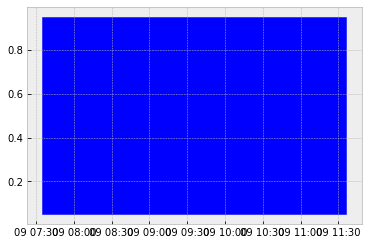

In [21]:
good_sections = incandescent_lamp.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [22]:
good_sections.combined()

[TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [23]:
incandescent_lamp.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALMH::

In [24]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [25]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [26]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [27]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['power', 'voltage', 'current', 'frequency', 'pf']

In [28]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['power', 'voltage', 'current', 'frequency', 'pf']

In [29]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['power', 'voltage', 'current', 'frequency', 'pf']

In [30]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (micro)


['power', 'voltage', 'current', 'frequency', 'pf']

In [31]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['power', 'voltage', 'current', 'frequency', 'pf']

In [32]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['power', 'voltage', 'current', 'frequency', 'pf']

In [33]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['power', 'voltage', 'current', 'frequency', 'pf']

In [34]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa)

['power', 'voltage', 'current', 'frequency', 'pf']

In [35]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['power', 'voltage', 'current', 'frequency', 'pf']

In [36]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['power', 'voltage', 'current', 'frequency', 'pf']

In [37]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['power', 'voltage', 'current', 'frequency', 'pf']

In [38]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (congelador)

['power', 'voltage', 'current', 'frequency', 'pf']

## Medidas disponibles relativas a la potencia


In [39]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [40]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [41]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [42]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [43]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [44]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [45]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 7

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [46]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 8

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [47]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 9

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [48]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 10

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

In [49]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 11

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic3',
 'armonic5',
 'armonic7',
 'armonic9',
 'armonic11',
 'armonic13',
 'armonic15',
 'armonic17',
 'armonic19',
 'armonic21',
 'armonic23',
 'armonic25',
 'armonic27',
 'armonic29',
 'armonic31',
 'armonic33',
 'armonic35',
 'armonic37',
 'armonic39',
 'armonic41',
 'armonic43',
 'armonic45',
 'armonic47',
 'armonic49']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [50]:
fan = elec['fan']
fan.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [51]:
incandescent_lamp = elec['incandescent lamp']
incandescent_lamp.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [52]:
fan = elec['fan']
fan.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [53]:
television = elec['television']
television.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [54]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [55]:
microwave = elec['microwave']
microwave.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [56]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [57]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [58]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [59]:
fridge = elec[10]
fridge.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


In [60]:
freezer = elec[11]
freezer.available_columns()

[('voltage', 'armonic41'),
 ('current', 'armonic37'),
 ('pf', None),
 ('voltage', 'armonic27'),
 ('power', 'armonic37'),
 ('current', None),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic17'),
 ('current', 'armonic19'),
 ('power', 'armonic17'),
 ('voltage', 'armonic31'),
 ('voltage', 'armonic25'),
 ('current', 'armonic11'),
 ('voltage', 'armonic9'),
 ('power', 'armonic39'),
 ('voltage', 'armonic3'),
 ('current', 'armonic49'),
 ('current', 'armonic41'),
 ('power', 'active'),
 ('power', 'armonic49'),
 ('current', 'armonic23'),
 ('voltage', 'armonic13'),
 ('voltage', 'armonic11'),
 ('voltage', 'armonic5'),
 ('voltage', 'armonic17'),
 ('voltage', 'armonic19'),
 ('current', 'armonic29'),
 ('voltage', None),
 ('power', 'armonic33'),
 ('current', 'armonic27'),
 ('power', 'armonic25'),
 ('voltage', 'armonic37'),
 ('current', 'armonic7'),
 ('power', 'armonic27'),
 ('current', 'armonic43'),
 ('current', 'armonic15'),
 ('current', 'armonic45'),
 ('power', 'armonic1'),


## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [61]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['power', 'voltage', 'current', 'frequency', 'pf']
Mediciones de Potencia disponibles - Dataset: ['armonic41', 'armonic17', 'armonic9', 'armonic25', 'armonic7', 'armonic23', 'armonic47', 'armonic37', 'armonic29', 'reactive', 'armonic11', 'armonic27', 'apparent', 'armonic15', 'armonic5', 'armonic45', 'active', 'armonic49', 'armonic33', 'armonic19', 'armonic31', 'armonic39', 'armonic3', 'armonic1', 'armonic43', 'armonic13', 'armonic35', 'armonic21']

Medidas disponibles por cada medidor:
Main: ['power', 'voltage', 'current', 'frequency', 'pf']
Electric furnace: ['power', 'voltage', 'current', 'frequency', 'pf']
Microwave: ['power', 'voltage', 'current', 'frequency', 'pf']
Television: ['power', 'voltage', 'current', 'frequency', 'pf']
Incandescent lamp: ['power', 'voltage', 'current', 'frequency', 'pf']
Vacuum cleaner: ['power', 'voltage', 'current', 'frequency', 'pf']
Electric space heater: ['power', 'voltage', 'current', 'frequency', 'pf']
Electric show

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [62]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

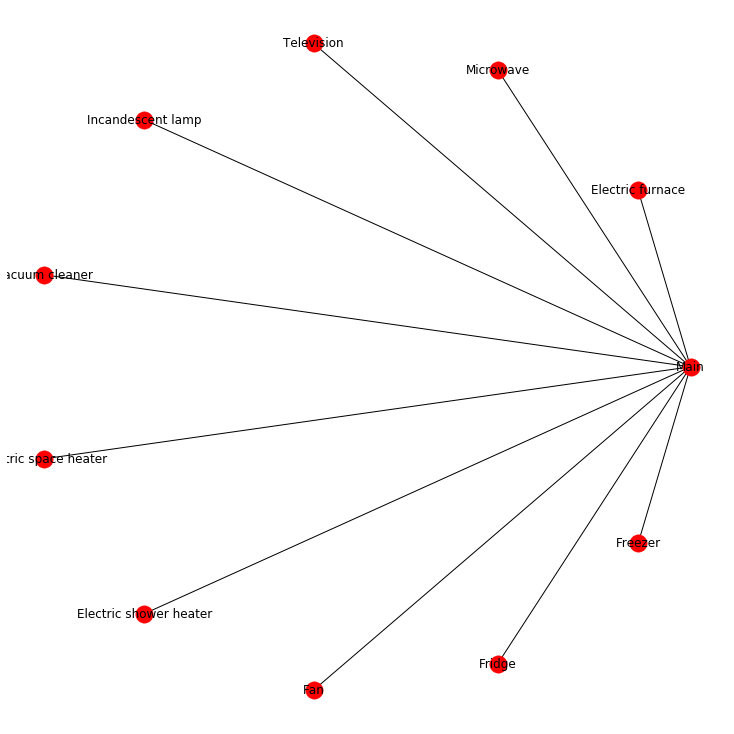

In [63]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [64]:
elec.get_timeframe()

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Incandescent lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,6.659478,5.627297,2.294427,7.115504,6.501459,7.061233,6.517518,5.679778,6.069320,7.105977
2023-06-09 09:35:00+02:00,6.707092,5.698653,2.361814,7.069730,6.455584,7.005193,6.463110,38.006298,6.088943,6.935067
2023-06-09 09:36:00+02:00,6.668864,5.694866,2.286583,7.041862,6.466071,6.992028,6.483055,42.328163,6.102707,7.086355
2023-06-09 09:37:00+02:00,6.665710,5.679041,2.312449,7.070269,6.468650,6.984940,6.485741,42.195866,6.094377,7.076911
2023-06-09 09:38:00+02:00,6.542811,5.614527,2.273815,6.990903,6.378938,6.853554,6.398967,41.459007,6.008909,7.012403
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,6.200086,5.260792,36.991589,89.132828,5.787588,5.099467,6.684597,38.864235,5.323210,6.082530
2023-06-09 13:33:00+02:00,6.177860,5.258028,36.880360,89.159805,5.749026,5.168129,6.656781,38.948231,5.304300,6.115490
2023-06-09 13:34:00+02:00,6.191128,5.236365,36.843582,89.147377,5.754669,5.190279,6.675655,38.965096,5.355768,6.124732
2023-06-09 13:35:00+02:00,6.195891,5.308487,30.708815,73.532433,5.789965,5.234657,6.653362,32.654724,5.323315,5.978276


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [66]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Incandescent lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,-0.952265,-2.036035,-1.746898,-1.688210,-0.086840,-4.206780,-1.238076,-2.092010,-1.376358,-2.247219
2023-06-09 09:35:00+02:00,-0.996361,-2.029599,-1.766816,-1.729704,-0.134160,-4.152298,-1.198263,-1.100987,-1.363500,-2.341162
2023-06-09 09:36:00+02:00,-0.929192,-2.057640,-1.742184,-1.694425,-0.140083,-4.167329,-1.175916,-1.308501,-1.371734,-2.302093
2023-06-09 09:37:00+02:00,-0.983328,-2.000033,-1.756005,-1.714417,-0.112890,-4.148509,-1.211860,-1.585360,-1.392082,-2.241467
2023-06-09 09:38:00+02:00,-0.961886,-2.011293,-1.756204,-1.688043,-0.106796,-4.109009,-1.184674,-1.765816,-1.401023,-2.191934
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,-0.866758,-1.905120,-8.130317,-0.560644,-0.690289,-3.484761,-1.035453,-1.394301,-1.628120,-2.197676
2023-06-09 13:33:00+02:00,-0.835902,-1.884691,-8.277808,-0.567273,-0.621572,-3.503221,-1.007057,-1.718788,-1.645586,-2.395096
2023-06-09 13:34:00+02:00,-0.810407,-1.835981,-8.217063,-0.541413,-0.575628,-3.485582,-1.017359,-1.921618,-1.625728,-2.507585
2023-06-09 13:35:00+02:00,-0.847250,-1.862680,-6.959409,-0.794972,-0.630249,-3.588269,-1.001137,-1.969772,-1.612331,-2.602485


Por ultimo, veamos la potencia aparente de los medidores del 2 al 11 (todos menos el principal).

In [67]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Incandescent lamp,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-06-09 09:34:00+02:00,6.734798,5.996874,2.899392,7.319202,6.513173,8.224914,6.640430,6.059402,6.229357,7.463022
2023-06-09 09:35:00+02:00,6.790720,6.071053,3.007250,7.286892,6.474675,8.152853,6.581085,38.071407,6.247759,7.507247
2023-06-09 09:36:00+02:00,6.741497,6.068726,2.892583,7.249585,6.476480,8.145453,6.595102,42.349602,6.262519,7.463902
2023-06-09 09:37:00+02:00,6.747662,6.039548,2.944080,7.282463,6.482029,8.131053,6.605154,42.226894,6.258857,7.431890
2023-06-09 09:38:00+02:00,6.621015,5.975497,2.891835,7.197885,6.389395,7.996661,6.515429,41.497829,6.177272,7.367433
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 13:32:00+02:00,6.277371,5.628080,37.882622,89.135750,5.861484,6.198991,6.774255,38.891197,5.578115,6.928940
2023-06-09 13:33:00+02:00,6.245570,5.599850,37.799618,89.162239,5.794959,6.250995,6.741214,38.987782,5.562084,6.593554
2023-06-09 13:34:00+02:00,6.254384,5.569857,37.750412,89.149658,5.800571,6.260343,6.760714,39.013798,5.608616,6.628055
2023-06-09 13:35:00+02:00,6.267454,5.646599,31.573292,73.583214,5.844032,6.356722,6.737170,32.762802,5.573218,6.730316


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [68]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2023-06-09 09:34:00+02:00 to 2023-06-09 13:36:00+02:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          243 non-null float32
(Microwave,)                 243 non-null float32
(Television,)                243 non-null float32
(Incandescent lamp,)         243 non-null float32
(Vacuum cleaner,)            243 non-null float32
(Electric space heater,)     243 non-null float32
(Electric shower heater,)    243 non-null float32
(Fan,)                       243 non-null float32
(Fridge,)                    243 non-null float32
(Freezer,)                   243 non-null float32
dtypes: float32(10)
memory usage: 11.4 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2 (Horno)  tenemos la siguinte tabla que nos muestra todas las medidas

In [69]:
t0 = '2023-06-09 09:34:38+02:00' #tiempo inicial
t1 = '2023-06-09 13:36:19+02:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 



#df_ef = next(elec[2].load()) #DataFrame medidor 
df_ef

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.039156  0.000349  0.777553  0.041214 -0.000024   
2023-06-09 09:34:39+02:00  0.032301  0.000425  0.777606  0.051435 -0.000017   
2023-06-09 09:34:40+02:00  0.039570  0.000384  0.841378  0.042361  0.000006   
2023-06-09 09:34:41+02:00  0.037010  0.000341  0.826423  0.042793 -0.000001   
2023-06-09 09:34:42+02:00  0.039868  0.000609  0.769048  0.041072  0.000038   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.164316  0.000532  0.630394  0.165205  0.000035   
2023-06-09 13:36:16+02:00  0.156897  0.000889  0.660436  0.178294  0.000129   
2023-06-09 13:36:17+02:00  0.169329  0.000755  0.586485  0.176856  0.000021   
2023-06-09 13:36:18+02:00  0.162180  0.000753  0.614202  0.178365  0.000113   
2023-06-09 13:36:19+02:00  0.158021  0.000532  0.646330  0.171739  0.000063   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.033479  250.569580  0.053485  0.000425  0.000745   
2023-06-09 09:34:39+02:00  0.031936  250.578476  0.049409  0.000352  0.000392   
2023-06-09 09:34:40+02:00  0.032987  250.775543  0.042647  0.000408  0.000329   
2023-06-09 09:34:41+02:00  0.032793  250.737640  0.049798  0.000403  0.000603   
2023-06-09 09:34:42+02:00  0.034406  250.566818  0.051958  0.000584  0.000659   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.037938  246.513840  0.258613  0.000758  0.001058   
2023-06-09 13:36:16+02:00  0.038523  246.479492  0.254501  0.000663  0.001235   
2023-06-09 13:36:17+02:00  0.038472  246.452240  0.251194  0.000667  0.000950   
2023-06-09 13:36:18+02:00  0.040589  246.370148  0.257366  0.000771  0.001434   
2023-06-09 13:36:19+02:00  0.038553  246.356140  0.256015  0.000763  0.001208   

physical_quantity          ...               power                      \
type                       ...  armonic1 armonic15 armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.026480  0.000020 -0.000009  0.000479   
2023-06-09 09:34:39+02:00  ...  0.025227 -0.000032  0.000001  0.001263   
2023-06-09 09:34:40+02:00  ...  0.028130  0.000049  0.000003  0.000899   
2023-06-09 09:34:41+02:00  ...  0.027559  0.000058  0.000002  0.000404   
2023-06-09 09:34:42+02:00  ...  0.026236  0.000073  0.000006  0.001390   
...                        ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  ...  0.024446 -0.000001 -0.000013  0.001362   
2023-06-09 13:36:16+02:00  ...  0.025648 -0.000243  0.000001  0.003923   
2023-06-09 13:36:17+02:00  ...  0.022733 -0.000083 -0.000002 -0.000467   
2023-06-09 13:36:18+02:00  ...  0.025024 -0.000064  0.000004  0.003472   
2023-06-09 13:36:19+02:00  ...  0.025112 -0.000195  0.000003  0.001604   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000325 -0.000022  0.024677  0.000808  0.223564   
2023-06-09 09:34:39+02:00  0.000024 -0.000026  0.020773  0.000452  0.219618   
2023-06-09 09:34:40+02:00  0.000174 -0.000006  0.016552  0.000586  0.215179   
2023-06-09 09:34:41+02:00 -0.000848 -0.000019  0.022260  0.000561  0.217733   
2023-06-09 09:34:42+02:00  0.000105 -0.000008  0.019034  0.000711  0.204011   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000172 -0.000146  0.049227  0.000915  0.595598   
2023-06-09 13:36:16+02:00  0.001553 -0.000084  0.051085  0.000540  0.585730   
2023-06-09 13:36:17+02:00  0.000935 -0.000071  0.050148  0.000860  0.589207   
2023-06-09 13:36:18+02:00 -0.000445 -0.000156  0.051117  0.001045  0.582304   
2023-06

Se puede visualizar solo la cabecera de los datos

In [70]:
df_ef.head()

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.039156  0.000349  0.777553  0.041214 -0.000024   
2023-06-09 09:34:39+02:00  0.032301  0.000425  0.777606  0.051435 -0.000017   
2023-06-09 09:34:40+02:00  0.039570  0.000384  0.841378  0.042361  0.000006   
2023-06-09 09:34:41+02:00  0.037010  0.000341  0.826423  0.042793 -0.000001   
2023-06-09 09:34:42+02:00  0.039868  0.000609  0.769048  0.041072  0.000038   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.033479  250.569580  0.053485  0.000425  0.000745   
2023-06-09 09:34:39+02:00  0.031936  250.578476  0.049409  0.000352  0.000392   
2023-06-09 09:34:40+02:00  0.032987  250.775543  0.042647  0.000408  0.000329   
2023-06-09 09:34:41+02:00  0.032793  250.737640  0.049798  0.000403  0.000603   
2023-06-09 09:34:42+02:00  0.034406  250.566818  0.051958  0.000584  0.000659   

physical_quantity          ...               power                      \
type                       ...  armonic1 armonic15 armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.026480  0.000020 -0.000009  0.000479   
2023-06-09 09:34:39+02:00  ...  0.025227 -0.000032  0.000001  0.001263   
2023-06-09 09:34:40+02:00  ...  0.028130  0.000049  0.000003  0.000899   
2023-06-09 09:34:41+02:00  ...  0.027559  0.000058  0.000002  0.000404   
2023-06-09 09:34:42+02:00  ...  0.026236  0.000073  0.000006  0.001390   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000325 -0.000022  0.024677  0.000808  0.223564   
2023-06-09 09:34:39+02:00  0.000024 -0.000026  0.020773  0.000452  0.219618   
2023-06-09 09:34:40+02:00  0.000174 -0.000006  0.016552  0.000586  0.215179   
2023-06-09 09:34:41+02:00 -0.000848 -0.000019  0.022260  0.000561  0.217733   
2023-06-09 09:34:42+02:00  0.000105 -0.000008  0.019034  0.000711  0.204011   

physical_quantity             power  
type                      armonic13  
2023-06-09 09:34:38+02:00  0.000245  
2023-06-09 09:34:39+02:00  0.000165  
2023-06-09 09:34:40+02:00  0.000307  
2023-06-09 09:34:41+02:00  0.000436  
2023-06-09 09:34:42+02:00  0.000020  

[5 rows x 82 columns]

Vemos para el meter nº 3(microwave) tenemos la siguinte tabla que nos muestra todas las medidas

In [71]:
df_microwave = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_microwave

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.039156  0.000378  0.717925  0.041214 -0.000023   
2023-06-09 09:34:39+02:00  0.032301  0.000409  0.718532  0.051435 -0.000012   
2023-06-09 09:34:40+02:00  0.039570  0.000411  0.744744  0.042361  0.000014   
2023-06-09 09:34:41+02:00  0.037010  0.000377  0.727866  0.042793 -0.000003   
2023-06-09 09:34:42+02:00  0.039868  0.000687  0.661870  0.041072 -0.000062   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.164316  0.000547  0.557617  0.165205  0.000054   
2023-06-09 13:36:16+02:00  0.156897  0.000675  0.485234  0.178294  0.000052   
2023-06-09 13:36:17+02:00  0.169329  0.000971  0.562451  0.176856  0.000029   
2023-06-09 13:36:18+02:00  0.162180  0.001087  0.485228  0.178365 -0.000108   
2023-06-09 13:36:19+02:00  0.158021  0.000623  0.534850  0.171739  0.000016   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.030328  250.569580  0.053485  0.000580  0.000775   
2023-06-09 09:34:39+02:00  0.030771  250.578476  0.049409  0.000460  0.000341   
2023-06-09 09:34:40+02:00  0.030475  250.775543  0.042647  0.000406  0.000320   
2023-06-09 09:34:41+02:00  0.030431  250.737640  0.049798  0.000433  0.000625   
2023-06-09 09:34:42+02:00  0.040222  250.566818  0.051958  0.001198  0.001125   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.044714  246.513840  0.258613  0.000853  0.001369   
2023-06-09 13:36:16+02:00  0.042818  246.479492  0.254501  0.001124  0.001162   
2023-06-09 13:36:17+02:00  0.047345  246.452240  0.251194  0.000718  0.001070   
2023-06-09 13:36:18+02:00  0.050431  246.370148  0.257366  0.001247  0.001265   
2023-06-09 13:36:19+02:00  0.043318  246.356140  0.256015  0.000819  0.000856   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.023095  0.000003 -9.000000e-06  0.001259   
2023-06-09 09:34:39+02:00  ...  0.023511  0.000004 -1.200000e-06  0.000617   
2023-06-09 09:34:40+02:00  ...  0.024069  0.000096  4.800000e-06  0.001779   
2023-06-09 09:34:41+02:00  ...  0.023950  0.000050  4.000000e-06  0.000691   
2023-06-09 09:34:42+02:00  ...  0.024070  0.000128  1.000000e-06 -0.001207   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.025705 -0.000256 -2.800000e-06  0.001503   
2023-06-09 13:36:16+02:00  ...  0.022938 -0.000093 -4.200000e-06  0.000558   
2023-06-09 13:36:17+02:00  ...  0.028595 -0.000033 -3.999999e-07  0.001884   
2023-06-09 13:36:18+02:00  ...  0.024180 -0.000067 -5.600000e-06  0.000368   
2023-06-09 13:36:19+02:00  ...  0.024765 -0.000147 -1.136868e-13 -0.001345   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00 -0.000529 -0.000013  0.024677  0.000585  0.223564   
2023-06-09 09:34:39+02:00  0.000590 -0.000012  0.020773  0.000550  0.219618   
2023-06-09 09:34:40+02:00  0.000429 -0.000004  0.016552  0.000587  0.215179   
2023-06-09 09:34:41+02:00  0.000627 -0.000011  0.022260  0.000584  0.217733   
2023-06-09 09:34:42+02:00 -0.000609 -0.000009  0.019034  0.001228  0.204011   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000708  0.000020  0.049227  0.000803  0.595598   
2023-06-09 13:36:16+02:00 -0.000272 -0.000162  0.051085  0.001410  0.585730   
2023-06-09 13:36:17+02:00  0.002962 -0.000084  0.050148  0.001367  0.589207   
2023-06-09 13:36:18+02:00  0.00227

Vemos para el meter nº 4(tv)  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [72]:
df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_tv

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.035782  0.000341  0.392844  0.042226  0.000010   
2023-06-09 09:34:39+02:00  0.032389  0.000371  0.440225  0.056383  0.000011   
2023-06-09 09:34:40+02:00  0.041410  0.000428  0.393261  0.037478  0.000027   
2023-06-09 09:34:41+02:00  0.034476  0.000323  0.445307  0.045234  0.000010   
2023-06-09 09:34:42+02:00  0.039058  0.000379  0.406373  0.038338 -0.000001   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.151336  0.000884  0.201156  0.179541  0.000160   
2023-06-09 13:36:16+02:00  0.161548  0.000598  0.223754  0.169271 -0.000001   
2023-06-09 13:36:17+02:00  0.156608  0.000784  0.241189  0.174274  0.000128   
2023-06-09 13:36:18+02:00  0.167209  0.000653  0.153999  0.173541  0.000131   
2023-06-09 13:36:19+02:00  0.167271  0.000741  0.079410  0.176311  0.000115   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.022967  249.519699  0.048033  0.000475  0.000233   
2023-06-09 09:34:39+02:00  0.022227  249.523636  0.044937  0.000469  0.000547   
2023-06-09 09:34:40+02:00  0.023024  249.722382  0.042969  0.000284  0.000561   
2023-06-09 09:34:41+02:00  0.021970  249.670853  0.044877  0.000400  0.000355   
2023-06-09 09:34:42+02:00  0.022299  249.500076  0.047773  0.000310  0.000485   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.040111  245.480865  0.257669  0.001135  0.000936   
2023-06-09 13:36:16+02:00  0.041299  245.494507  0.252800  0.001210  0.000974   
2023-06-09 13:36:17+02:00  0.031810  245.448898  0.253979  0.000945  0.001073   
2023-06-09 13:36:18+02:00  0.041735  245.435028  0.252164  0.001024  0.001281   
2023-06-09 13:36:19+02:00  0.039928  245.331116  0.251635  0.000557  0.001003   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.011693  0.000042 -3.200000e-06  0.001590   
2023-06-09 09:34:39+02:00  ...  0.012020  0.000003  6.000001e-07  0.000769   
2023-06-09 09:34:40+02:00  ...  0.011389  0.000021 -7.800000e-06  0.000215   
2023-06-09 09:34:41+02:00  ...  0.011741  0.000022  3.200000e-06 -0.000159   
2023-06-09 09:34:42+02:00  ...  0.011879  0.000077  3.600000e-06  0.000364   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.011582 -0.000018 -1.300000e-05  0.002157   
2023-06-09 13:36:16+02:00  ...  0.011364 -0.000165 -6.600000e-06  0.002669   
2023-06-09 13:36:17+02:00  ...  0.011400 -0.000025  9.200000e-06  0.000964   
2023-06-09 13:36:18+02:00  ...  0.011327 -0.000137 -1.840000e-05 -0.000436   
2023-06-09 13:36:19+02:00  ...  0.007145 -0.000062  9.750001e-06  0.000679   

physical_quantity                                   voltage   current  \
type                       armonic3     armonic21 armonic49 armonic13   
2023-06-09 09:34:38+02:00  0.001337 -6.000000e-06  0.024025  0.000652   
2023-06-09 09:34:39+02:00  0.000470 -1.380000e-05  0.022202  0.000441   
2023-06-09 09:34:40+02:00  0.000369 -1.180000e-05  0.020795  0.000583   
2023-06-09 09:34:41+02:00  0.000645 -7.800000e-06  0.025782  0.000541   
2023-06-09 09:34:42+02:00  0.000674  3.999999e-07  0.020501  0.000447   
...                             ...           ...       ...       ...   
2023-06-09 13:36:15+02:00 -0.000304 -1.398000e-04  0.051992  0.001604   
2023-06-09 13:36:16+02:00  0.002960 -2.328000e-04  0.045080  0.001582   
2023-06-09 13:36:17+02:00  0.001727 -1.426000e-04  0.051655  0.001205   
2023-06-09 13:36:18+02:00  0.002675 -1.098000e-04  0.051291  0.001100   
2023-06-09 13:36:19+02:00 -

Veamos para el meter nº 5(bulb)  tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
df_bulb = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_bulb

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.039156  0.000347  0.803069  0.041214  0.000005   
2023-06-09 09:34:39+02:00  0.032301  0.000522  0.811182  0.051435 -0.000007   
2023-06-09 09:34:40+02:00  0.039570  0.000348  0.817404  0.042361  0.000008   
2023-06-09 09:34:41+02:00  0.037010  0.000491  0.829894  0.042793 -0.000029   
2023-06-09 09:34:42+02:00  0.039868  0.000320  0.850206  0.041072 -0.000009   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.164316  0.000662  0.675882  0.165205  0.000105   
2023-06-09 13:36:16+02:00  0.156897  0.000689  0.642241  0.178294  0.000024   
2023-06-09 13:36:17+02:00  0.169329  0.000818  0.673558  0.176856  0.000023   
2023-06-09 13:36:18+02:00  0.162180  0.000751  0.651011  0.178365  0.000008   
2023-06-09 13:36:19+02:00  0.158021  0.000483  0.640577  0.171739  0.000043   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.035479  250.569580  0.053485  0.000405  0.000763   
2023-06-09 09:34:39+02:00  0.033995  250.578476  0.049409  0.000428  0.000382   
2023-06-09 09:34:40+02:00  0.034302  250.775543  0.042647  0.000504  0.000246   
2023-06-09 09:34:41+02:00  0.033618  250.737640  0.049798  0.000615  0.000586   
2023-06-09 09:34:42+02:00  0.034108  250.566818  0.051958  0.000313  0.000484   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.042129  246.513840  0.258613  0.000445  0.001148   
2023-06-09 13:36:16+02:00  0.041361  246.479492  0.254501  0.000693  0.001066   
2023-06-09 13:36:17+02:00  0.045683  246.452240  0.251194  0.000904  0.000886   
2023-06-09 13:36:18+02:00  0.041331  246.370148  0.257366  0.000771  0.000995   
2023-06-09 13:36:19+02:00  0.041680  246.356140  0.256015  0.000896  0.000778   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.029328  0.000029 -1.340000e-05  0.001100   
2023-06-09 09:34:39+02:00  ...  0.028567 -0.000024 -2.200000e-06  0.001383   
2023-06-09 09:34:40+02:00  ...  0.028687  0.000042  4.600000e-06  0.001379   
2023-06-09 09:34:41+02:00  ...  0.028508  0.000061 -9.999999e-07  0.000680   
2023-06-09 09:34:42+02:00  ...  0.029681  0.000057  4.400000e-06  0.000199   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.029174 -0.000117 -3.400000e-06  0.002075   
2023-06-09 13:36:16+02:00  ...  0.027524 -0.000063  1.000000e-06  0.001561   
2023-06-09 13:36:17+02:00  ...  0.031943 -0.000070  3.999999e-07  0.001607   
2023-06-09 13:36:18+02:00  ...  0.027649 -0.000017 -3.999999e-07  0.001129   
2023-06-09 13:36:19+02:00  ...  0.027601 -0.000169 -3.750000e-06 -0.000625   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000677 -0.000017  0.024677  0.000601  0.223564   
2023-06-09 09:34:39+02:00  0.000418 -0.000014  0.020773  0.000599  0.219618   
2023-06-09 09:34:40+02:00  0.001030 -0.000002  0.016552  0.000567  0.215179   
2023-06-09 09:34:41+02:00  0.000871 -0.000017  0.022260  0.000649  0.217733   
2023-06-09 09:34:42+02:00  0.000073  0.000002  0.019034  0.000794  0.204011   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000687  0.000020  0.049227  0.000647  0.595598   
2023-06-09 13:36:16+02:00  0.000345 -0.000132  0.051085  0.000873  0.585730   
2023-06-09 13:36:17+02:00  0.002331 -0.000090  0.050148  0.001164  0.589207   
2023-06-09 13:36:18+02:00  0.00100

Veamos para el meter nº 6(vacum cleaner)  tenemos la siguinte tabla que nos muestra todas las medidas

In [74]:
df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vac

physical_quantity           voltage   current        pf   voltage  \
type                      armonic41 armonic37           armonic27   
2023-06-09 09:34:38+02:00  0.039156  0.000383  0.799124  0.041214   
2023-06-09 09:34:39+02:00  0.032301  0.000419  0.806559  0.051435   
2023-06-09 09:34:40+02:00  0.039570  0.000380  0.821705  0.042361   
2023-06-09 09:34:41+02:00  0.037010  0.000483  0.734256  0.042793   
2023-06-09 09:34:42+02:00  0.039868  0.000551  0.757480  0.041072   
...                             ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.164316  0.000682  0.594285  0.165205   
2023-06-09 13:36:16+02:00  0.156897  0.000897  0.542709  0.178294   
2023-06-09 13:36:17+02:00  0.169329  0.000821  0.521803  0.176856   
2023-06-09 13:36:18+02:00  0.162180  0.000694  0.537819  0.178365   
2023-06-09 13:36:19+02:00  0.158021  0.000502  0.537648  0.171739   

physical_quantity                 power   current     voltage            \
type                          armonic37              armonic1 armonic29   
2023-06-09 09:34:38+02:00  7.999999e-07  0.033166  250.569580  0.053485   
2023-06-09 09:34:39+02:00 -5.020000e-05  0.031980  250.578476  0.049409   
2023-06-09 09:34:40+02:00  2.400000e-06  0.031883  250.775543  0.042647   
2023-06-09 09:34:41+02:00 -1.360000e-05  0.038470  250.737640  0.049798   
2023-06-09 09:34:42+02:00 -2.720000e-05  0.034831  250.566818  0.051958   
...                                 ...       ...         ...       ...   
2023-06-09 13:36:15+02:00  1.220000e-04  0.044535  246.513840  0.258613   
2023-06-09 13:36:16+02:00 -5.999992e-07  0.041875  246.479492  0.254501   
2023-06-09 13:36:17+02:00 -3.300000e-05  0.053089  246.452240  0.251194   
2023-06-09 13:36:18+02:00  1.440000e-05  0.044349  246.370148  0.257366   
2023-06-09 13:36:19+02:00  2.225000e-05  0.042820  246.356140  0.256015   

physical_quantity           current            ...               power  \
type                      armonic17 armonic19  ...  armonic1 armonic15   
2023-06-09 09:34:38+02:00  0.000446  0.000513  ...  0.026517  0.000039   
2023-06-09 09:34:39+02:00  0.000439  0.000429  ...  0.025792 -0.000020   
2023-06-09 09:34:40+02:00  0.000473  0.000261  ...  0.026193  0.000025   
2023-06-09 09:34:41+02:00  0.000608  0.000613  ...  0.026053  0.000153   
2023-06-09 09:34:42+02:00  0.000719  0.000759  ...  0.025652  0.000108   
...                             ...       ...  ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000812  0.001312  ...  0.026556 -0.000257   
2023-06-09 13:36:16+02:00  0.000901  0.001204  ...  0.023177 -0.000107   
2023-06-09 13:36:17+02:00  0.000766  0.001052  ...  0.027886  0.000017   
2023-06-09 13:36:18+02:00  0.001034  0.000492  ...  0.024237  0.000027   
2023-06-09 13:36:19+02:00  0.001186  0.000997  ...  0.023341 -0.000099   

physical_quantity                                                          \
type                          armonic45  armonic7  armonic3     armonic21   
2023-06-09 09:34:38+02:00 -9.200000e-06  0.001557  0.001596 -9.000000e-06   
2023-06-09 09:34:39+02:00 -1.800000e-06  0.000573  0.000480 -7.000000e-06   
2023-06-09 09:34:40+02:00  5.600000e-06  0.000512  0.000462 -4.200000e-06   
2023-06-09 09:34:41+02:00  1.840000e-05  0.000944  0.000061 -2.100000e-05   
2023-06-09 09:34:42+02:00 -8.200000e-06  0.000596  0.000398 -1.320000e-05   
...                                 ...       ...       ...           ...   
2023-06-09 13:36:15+02:00  3.800000e-06  0.001945 -0.000382 -1.020000e-05   
2023-06-09 13:36:16+02:00 -2.000000e-07  0.000295  0.000441 -2.298000e-04   
2023-06-09 13:36:17+02:00  9.000000e-06  0.001676  0.000798 -1.999986e-07   
2023-06-09 13:36:18+02:00 -3.800000e-06 -0.000164  0.001686 -1.292000e-04   
2023-06-09 13:36:19+02:00 -7.250000e-06 -0.000726 -0.000263 -1.925000e-05   

physical_quantity           voltage   current   voltage     power  
type                      armonic49 armonic13 armonic23 armonic13  
2023-06-09 09:34:38+02:00

Veamos para el meter nº 7(electric space heater), es decir calefactor de aceite, tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:

df_esh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_esh

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.035782  0.000358  0.744789  0.042226  0.000010   
2023-06-09 09:34:39+02:00  0.032389  0.000382  0.746891  0.056383 -0.000003   
2023-06-09 09:34:40+02:00  0.041410  0.000445  0.733304  0.037478  0.000054   
2023-06-09 09:34:41+02:00  0.034476  0.000388  0.741673  0.045234  0.000020   
2023-06-09 09:34:42+02:00  0.039058  0.000444  0.745772  0.038338  0.000007   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.151336  0.000575  0.580176  0.179541  0.000057   
2023-06-09 13:36:16+02:00  0.161548  0.000694  0.582537  0.169271  0.000047   
2023-06-09 13:36:17+02:00  0.156608  0.000883  0.631777  0.174274  0.000179   
2023-06-09 13:36:18+02:00  0.167209  0.000639  0.555214  0.173541  0.000032   
2023-06-09 13:36:19+02:00  0.167271  0.000470  0.622037  0.176311  0.000068   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.038570  249.519699  0.048033  0.000553  0.000318   
2023-06-09 09:34:39+02:00  0.037971  249.523636  0.044937  0.000402  0.000471   
2023-06-09 09:34:40+02:00  0.037568  249.722382  0.042969  0.000357  0.000609   
2023-06-09 09:34:41+02:00  0.038409  249.670853  0.044877  0.000301  0.000364   
2023-06-09 09:34:42+02:00  0.037942  249.500076  0.047773  0.000375  0.000533   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.039726  245.480865  0.257669  0.000771  0.001095   
2023-06-09 13:36:16+02:00  0.040144  245.494507  0.252800  0.001054  0.001751   
2023-06-09 13:36:17+02:00  0.037951  245.448898  0.253979  0.000687  0.001118   
2023-06-09 13:36:18+02:00  0.040907  245.435028  0.252164  0.001058  0.000942   
2023-06-09 13:36:19+02:00  0.042654  245.331116  0.251635  0.000615  0.000801   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.033540  0.000050  2.000000e-07  0.001982   
2023-06-09 09:34:39+02:00  ...  0.032960  0.000021  3.400000e-06  0.001806   
2023-06-09 09:34:40+02:00  ...  0.031924  0.000058 -3.400000e-06  0.000876   
2023-06-09 09:34:41+02:00  ...  0.033268  0.000050  4.200000e-06  0.001423   
2023-06-09 09:34:42+02:00  ...  0.032900  0.000078  2.600000e-06  0.002051   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.027825 -0.000054 -1.620000e-05  0.003029   
2023-06-09 13:36:16+02:00  ...  0.028131 -0.000005 -4.600000e-06  0.003380   
2023-06-09 13:36:17+02:00  ...  0.028687 -0.000165  7.200000e-06  0.003195   
2023-06-09 13:36:18+02:00  ...  0.027067 -0.000024 -9.000000e-06  0.003569   
2023-06-09 13:36:19+02:00  ...  0.031664  0.000055 -2.250000e-06  0.002049   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000712 -0.000009  0.024025  0.000809  0.221528   
2023-06-09 09:34:39+02:00  0.000704 -0.000027  0.022202  0.000566  0.221956   
2023-06-09 09:34:40+02:00  0.000266 -0.000009  0.020795  0.000492  0.216692   
2023-06-09 09:34:41+02:00 -0.000532 -0.000002  0.025782  0.000729  0.212053   
2023-06-09 09:34:42+02:00  0.000499 -0.000007  0.020501  0.000867  0.205552   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.001092 -0.000057  0.051992  0.000650  0.597980   
2023-06-09 13:36:16+02:00 -0.000575 -0.000035  0.045080  0.001292  0.584985   
2023-06-09 13:36:17+02:00  0.000421 -0.000073  0.051655  0.000730  0.584449   
2023-06-09 13:36:18+02:00 -0.00072

Veamos para el meter nº 8(fan) tenemos la siguinte tabla que nos muestra todas las medidas

In [76]:

df_fan = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.036372  0.000383  0.796425  0.040843  0.000033   
2023-06-09 09:34:39+02:00  0.032701  0.000372  0.775525  0.054652 -0.000012   
2023-06-09 09:34:40+02:00  0.039388  0.000363  0.790313  0.046273  0.000020   
2023-06-09 09:34:41+02:00  0.035598  0.000402  0.760031  0.056001  0.000030   
2023-06-09 09:34:42+02:00  0.038020  0.000383  0.777230  0.037283  0.000012   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.142680  0.000314  0.708287  0.132919  0.000025   
2023-06-09 13:36:16+02:00  0.153255  0.000408  0.739258  0.171028  0.000033   
2023-06-09 13:36:17+02:00  0.140593  0.000454  0.688204  0.149576  0.000040   
2023-06-09 13:36:18+02:00  0.151076  0.000396  0.689404  0.167970  0.000048   
2023-06-09 13:36:19+02:00  0.153662  0.000558  0.712321  0.164442  0.000034   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.031108  249.064331  0.047324  0.000422  0.000528   
2023-06-09 09:34:39+02:00  0.031185  249.115387  0.044984  0.000290  0.000334   
2023-06-09 09:34:40+02:00  0.030569  248.847702  0.057760  0.000277  0.000566   
2023-06-09 09:34:41+02:00  0.032902  248.796509  0.058461  0.000562  0.000403   
2023-06-09 09:34:42+02:00  0.030407  248.861328  0.058127  0.000289  0.000528   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.030919  244.252243  0.174269  0.000395  0.000671   
2023-06-09 13:36:16+02:00  0.030005  245.049255  0.248992  0.000346  0.000891   
2023-06-09 13:36:17+02:00  0.030680  244.192795  0.189497  0.000550  0.000566   
2023-06-09 13:36:18+02:00  0.030710  244.959702  0.245171  0.000518  0.000642   
2023-06-09 13:36:19+02:00  0.031011  244.876968  0.247040  0.000501  0.000692   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.025552  0.000027 -5.200000e-06  0.000869   
2023-06-09 09:34:39+02:00  ...  0.024879  0.000003 -1.200000e-06  0.000794   
2023-06-09 09:34:40+02:00  ...  0.024714 -0.000016  3.000000e-06  0.000430   
2023-06-09 09:34:41+02:00  ...  0.025494 -0.000014 -9.800000e-06  0.001344   
2023-06-09 09:34:42+02:00  ...  0.024172  0.000022 -4.000000e-07  0.001232   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.023059 -0.000020  2.800000e-06  0.001350   
2023-06-09 13:36:16+02:00  ...  0.023468 -0.000036 -1.600000e-06  0.001651   
2023-06-09 13:36:17+02:00  ...  0.022329 -0.000165  8.800000e-06  0.001112   
2023-06-09 13:36:18+02:00  ...  0.021815 -0.000086 -3.400000e-06  0.002045   
2023-06-09 13:36:19+02:00  ...  0.023186 -0.000075  3.200000e-06  0.001130   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000667 -0.000004  0.023295  0.000338  0.205288   
2023-06-09 09:34:39+02:00 -0.000025 -0.000008  0.018216  0.000545  0.211594   
2023-06-09 09:34:40+02:00  0.000401  0.000003  0.030196  0.000622  0.220195   
2023-06-09 09:34:41+02:00  0.000037 -0.000009  0.032930  0.000613  0.194104   
2023-06-09 09:34:42+02:00 -0.000618  0.000002  0.019401  0.000506  0.160752   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.001129 -0.000066  0.053323  0.000358  0.482211   
2023-06-09 13:36:16+02:00  0.001061 -0.000103  0.047521  0.000251  0.579955   
2023-06-09 13:36:17+02:00  0.000065 -0.000080  0.053951  0.000482  0.475626   
2023-06-09 13:36:18+02:00  0.00008

Veamos para el meter nº 9(fridge) tenemos la siguinte tabla que nos muestra todas las medidas

In [79]:

df_fridge = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fridge

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.036372  0.000352  0.751706  0.040843  0.000022   
2023-06-09 09:34:39+02:00  0.032701  0.000432  0.753813  0.054652 -0.000007   
2023-06-09 09:34:40+02:00  0.039388  0.000312  0.760461  0.046273  0.000021   
2023-06-09 09:34:41+02:00  0.035598  0.000454  0.741392  0.056001  0.000041   
2023-06-09 09:34:42+02:00  0.038020  0.000576  0.742595  0.037283  0.000029   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.142680  0.000273  0.675731  0.132919  0.000027   
2023-06-09 13:36:16+02:00  0.153255  0.000348  0.678254  0.171028  0.000022   
2023-06-09 13:36:17+02:00  0.140593  0.000464  0.663358  0.149576  0.000020   
2023-06-09 13:36:18+02:00  0.151076  0.000531  0.633013  0.167970 -0.000002   
2023-06-09 13:36:19+02:00  0.153662  0.000293  0.680562  0.164442  0.000049   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.031244  249.064331  0.047324  0.000437  0.000415   
2023-06-09 09:34:39+02:00  0.031651  249.115387  0.044984  0.000577  0.000317   
2023-06-09 09:34:40+02:00  0.030278  248.847702  0.057760  0.000556  0.000553   
2023-06-09 09:34:41+02:00  0.029634  248.796509  0.058461  0.000344  0.000553   
2023-06-09 09:34:42+02:00  0.031718  248.861328  0.058127  0.000383  0.000458   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.027637  244.252243  0.174269  0.000659  0.000854   
2023-06-09 13:36:16+02:00  0.026729  245.049255  0.248992  0.000382  0.000856   
2023-06-09 13:36:17+02:00  0.027212  244.192795  0.189497  0.000369  0.000682   
2023-06-09 13:36:18+02:00  0.028430  244.959702  0.245171  0.000541  0.000633   
2023-06-09 13:36:19+02:00  0.027863  244.876968  0.247040  0.000276  0.000662   

physical_quantity          ...               power                      \
type                       ...  armonic1 armonic15 armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.025335  0.000036 -0.000005  0.000948   
2023-06-09 09:34:39+02:00  ...  0.025218 -0.000009  0.000002  0.001506   
2023-06-09 09:34:40+02:00  ...  0.024382  0.000013  0.000003  0.001346   
2023-06-09 09:34:41+02:00  ...  0.023315  0.000007 -0.000004  0.000951   
2023-06-09 09:34:42+02:00  ...  0.024668  0.000024  0.000003  0.000947   
...                        ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  ...  0.019718 -0.000024  0.000001  0.001563   
2023-06-09 13:36:16+02:00  ...  0.019214 -0.000064  0.000001  0.002055   
2023-06-09 13:36:17+02:00  ...  0.019439 -0.000163  0.000004  0.001819   
2023-06-09 13:36:18+02:00  ...  0.020015 -0.000035  0.000002  0.001491   
2023-06-09 13:36:19+02:00  ...  0.020278 -0.000045  0.000001  0.001942   

physical_quantity                                   voltage   current  \
type                       armonic3     armonic21 armonic49 armonic13   
2023-06-09 09:34:38+02:00 -0.000819  2.000000e-06  0.023295  0.000622   
2023-06-09 09:34:39+02:00 -0.000974 -2.600000e-06  0.018216  0.000413   
2023-06-09 09:34:40+02:00 -0.000131 -8.000000e-07  0.030196  0.000734   
2023-06-09 09:34:41+02:00 -0.000204 -6.600000e-06  0.032930  0.000531   
2023-06-09 09:34:42+02:00  0.000064 -5.600000e-06  0.019401  0.000610   
...                             ...           ...       ...       ...   
2023-06-09 13:36:15+02:00  0.000844 -2.820000e-05  0.053323  0.000490   
2023-06-09 13:36:16+02:00 -0.000318 -8.920000e-05  0.047521  0.000333   
2023-06-09 13:36:17+02:00  0.000759 -8.040000e-05  0.053951  0.000673   
2023-06-09 13:36:18+02:00  0.000311 -8.420000e-05  0.047666  0.000452   
2023-06-09 13:36:19+02:00  0.000414 -3.320000e-05  0.048997  0.000480   

physi

Veamos para el ultimo meter nº 10(Freezer)  tenemos la siguinte tabla que nos muestra todas las medidas

In [80]:




df_freezer = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity           voltage   current        pf   voltage     power  \
type                      armonic41 armonic37           armonic27 armonic37   
2023-06-09 09:34:38+02:00  0.036372  0.000383  0.796425  0.040843  0.000033   
2023-06-09 09:34:39+02:00  0.032701  0.000372  0.775525  0.054652 -0.000012   
2023-06-09 09:34:40+02:00  0.039388  0.000363  0.790313  0.046273  0.000020   
2023-06-09 09:34:41+02:00  0.035598  0.000402  0.760031  0.056001  0.000030   
2023-06-09 09:34:42+02:00  0.038020  0.000383  0.777230  0.037283  0.000012   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.142680  0.000314  0.708287  0.132919  0.000025   
2023-06-09 13:36:16+02:00  0.153255  0.000408  0.739258  0.171028  0.000033   
2023-06-09 13:36:17+02:00  0.140593  0.000454  0.688204  0.149576  0.000040   
2023-06-09 13:36:18+02:00  0.151076  0.000396  0.689404  0.167970  0.000048   
2023-06-09 13:36:19+02:00  0.153662  0.000558  0.712321  0.164442  0.000034   

physical_quantity           current     voltage             current            \
type                                   armonic1 armonic29 armonic17 armonic19   
2023-06-09 09:34:38+02:00  0.031108  249.064331  0.047324  0.000422  0.000528   
2023-06-09 09:34:39+02:00  0.031185  249.115387  0.044984  0.000290  0.000334   
2023-06-09 09:34:40+02:00  0.030569  248.847702  0.057760  0.000277  0.000566   
2023-06-09 09:34:41+02:00  0.032902  248.796509  0.058461  0.000562  0.000403   
2023-06-09 09:34:42+02:00  0.030407  248.861328  0.058127  0.000289  0.000528   
...                             ...         ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.030919  244.252243  0.174269  0.000395  0.000671   
2023-06-09 13:36:16+02:00  0.030005  245.049255  0.248992  0.000346  0.000891   
2023-06-09 13:36:17+02:00  0.030680  244.192795  0.189497  0.000550  0.000566   
2023-06-09 13:36:18+02:00  0.030710  244.959702  0.245171  0.000518  0.000642   
2023-06-09 13:36:19+02:00  0.031011  244.876968  0.247040  0.000501  0.000692   

physical_quantity          ...               power                          \
type                       ...  armonic1 armonic15     armonic45  armonic7   
2023-06-09 09:34:38+02:00  ...  0.025552  0.000027 -5.200000e-06  0.000869   
2023-06-09 09:34:39+02:00  ...  0.024879  0.000003 -1.200000e-06  0.000794   
2023-06-09 09:34:40+02:00  ...  0.024714 -0.000016  3.000000e-06  0.000430   
2023-06-09 09:34:41+02:00  ...  0.025494 -0.000014 -9.800000e-06  0.001344   
2023-06-09 09:34:42+02:00  ...  0.024172  0.000022 -4.000000e-07  0.001232   
...                        ...       ...       ...           ...       ...   
2023-06-09 13:36:15+02:00  ...  0.023059 -0.000020  2.800000e-06  0.001350   
2023-06-09 13:36:16+02:00  ...  0.023468 -0.000036 -1.600000e-06  0.001651   
2023-06-09 13:36:17+02:00  ...  0.022329 -0.000165  8.800000e-06  0.001112   
2023-06-09 13:36:18+02:00  ...  0.021815 -0.000086 -3.400000e-06  0.002045   
2023-06-09 13:36:19+02:00  ...  0.023186 -0.000075  3.200000e-06  0.001130   

physical_quantity                               voltage   current   voltage  \
type                       armonic3 armonic21 armonic49 armonic13 armonic23   
2023-06-09 09:34:38+02:00  0.000667 -0.000004  0.023295  0.000338  0.205288   
2023-06-09 09:34:39+02:00 -0.000025 -0.000008  0.018216  0.000545  0.211594   
2023-06-09 09:34:40+02:00  0.000401  0.000003  0.030196  0.000622  0.220195   
2023-06-09 09:34:41+02:00  0.000037 -0.000009  0.032930  0.000613  0.194104   
2023-06-09 09:34:42+02:00 -0.000618  0.000002  0.019401  0.000506  0.160752   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:36:15+02:00  0.001129 -0.000066  0.053323  0.000358  0.482211   
2023-06-09 13:36:16+02:00  0.001061 -0.000103  0.047521  0.000251  0.579955   
2023-06-09 13:36:17+02:00  0.000065 -0.000080  0.053951  0.000482  0.475626   
2023-06-09 13:36:18+02:00  0.00008

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [81]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9864493457234285

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [82]:
series = next(fan.power_series())
series.head()

2023-06-09 09:34:38+02:00    5.851006
2023-06-09 09:34:39+02:00    5.950320
2023-06-09 09:34:40+02:00    5.738094
2023-06-09 09:34:41+02:00    5.479184
2023-06-09 09:34:42+02:00    5.866570
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [83]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2023-06-09 09:34:38+02:00   -2.357986
2023-06-09 09:34:39+02:00   -2.031962
2023-06-09 09:34:40+02:00   -1.992984
2023-06-09 09:34:41+02:00   -1.940938
2023-06-09 09:34:42+02:00   -1.882722
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [84]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2023-06-09 09:34:38+02:00,-2.357986
2023-06-09 09:34:39+02:00,-2.031962
2023-06-09 09:34:40+02:00,-1.992984
2023-06-09 09:34:41+02:00,-1.940938
2023-06-09 09:34:42+02:00,-1.882722


Para cargar datos de voltaje:

In [85]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity           voltage                                            \
type                      armonic41 armonic27    armonic1 armonic29 armonic31   
2023-06-09 09:34:38+02:00  0.036372  0.040843  249.064331  0.047324  0.152165   
2023-06-09 09:34:39+02:00  0.032701  0.054652  249.115387  0.044984  0.161692   
2023-06-09 09:34:40+02:00  0.039388  0.046273  248.847702  0.057760  0.164002   
2023-06-09 09:34:41+02:00  0.035598  0.056001  248.796509  0.058461  0.144076   
2023-06-09 09:34:42+02:00  0.038020  0.037283  248.861328  0.058127  0.136907   

physical_quantity                                                            \
type                      armonic25  armonic9  armonic3 armonic13 armonic11   
2023-06-09 09:34:38+02:00  0.191434  2.089784  1.694135  0.887749  0.096548   
2023-06-09 09:34:39+02:00  0.217129  2.084615  1.704222  0.906317  0.076548   
2023-06-09 09:34:40+02:00  0.233482  1.954415  1.854882  0.794902  0.117317   
2023-06-09 09:34:41+02:00  0.205216  1.891233  1.750374  0.746543  0.113391   
2023-06-09 09:34:42+02:00  0.175613  2.009440  1.750615  0.822899  0.072374   

physical_quantity          ...                                          \
type                       ... armonic15 armonic45  armonic7 armonic33   
2023-06-09 09:34:38+02:00  ...  0.198407  0.030889  2.736000  0.058290   
2023-06-09 09:34:39+02:00  ...  0.206178  0.022348  2.721714  0.057156   
2023-06-09 09:34:40+02:00  ...  0.184860  0.028138  2.595181  0.048964   
2023-06-09 09:34:41+02:00  ...  0.149383  0.031426  2.508334  0.048604   
2023-06-09 09:34:42+02:00  ...  0.150118  0.031265  2.586048  0.054021   

physical_quantity                                                            \
type                      armonic21 armonic47 armonic43 armonic35 armonic49   
2023-06-09 09:34:38+02:00  0.044588  0.047354  0.035373  0.164611  0.023295   
2023-06-09 09:34:39+02:00  0.047673  0.051174  0.023572  0.185548  0.018216   
2023-06-09 09:34:40+02:00  0.047781  0.053319  0.026168  0.187934  0.030196   
2023-06-09 09:34:41+02:00  0.046738  0.047393  0.034137  0.168350  0.032930   
2023-06-09 09:34:42+02:00  0.037711  0.048830  0.029592  0.168922  0.019401   

physical_quantity                    
type                      armonic23  
2023-06-09 09:34:38+02:00  0.205288  
2023-06-09 09:34:39+02:00  0.211594  
2023-06-09 09:34:40+02:00  0.220195  
2023-06-09 09:34:41+02:00  0.194104  
2023-06-09 09:34:42+02:00  0.160752  

[5 rows x 26 columns]

In [86]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                                    \
type                      armonic37 armonic17     armonic39    active   
2023-06-09 09:34:38+02:00  0.000022  0.000151  2.600000e-06  5.851006   
2023-06-09 09:34:39+02:00 -0.000007  0.000107  1.000000e-06  5.950320   
2023-06-09 09:34:40+02:00  0.000021  0.000163  2.200000e-06  5.738094   
2023-06-09 09:34:41+02:00  0.000041  0.000090  8.000000e-07  5.479184   
2023-06-09 09:34:42+02:00  0.000029  0.000104 -2.000000e-07  5.866570   

physical_quantity                                                      \
type                      armonic49 armonic33 armonic25     armonic27   
2023-06-09 09:34:38+02:00  0.000003  0.000004  0.000032 -9.000000e-06   
2023-06-09 09:34:39+02:00  0.000002  0.000010  0.000046  5.999999e-07   
2023-06-09 09:34:40+02:00  0.000005 -0.000003  0.000059 -2.200000e-06   
2023-06-09 09:34:41+02:00  0.000002 -0.000012  0.000016 -1.500000e-05   
2023-06-09 09:34:42+02:00 -0.000003 -0.000002  0.000034 -1.600000e-06   

physical_quantity                                  ...            \
type                       armonic1     armonic43  ...  armonic9   
2023-06-09 09:34:38+02:00  5.846790  8.000000e-06  ... -0.000137   
2023-06-09 09:34:39+02:00  5.943032 -1.400000e-06  ...  0.000307   
2023-06-09 09:34:40+02:00  5.718900  8.000001e-07  ...  0.000673   
2023-06-09 09:34:41+02:00  5.460998  4.400000e-06  ...  0.000177   
2023-06-09 09:34:42+02:00  5.841926  1.200000e-06  ...  0.000187   

physical_quantity                                                      \
type                          armonic29 armonic31  apparent armonic15   
2023-06-09 09:34:38+02:00  3.000000e-06  0.000005  6.313834  0.000036   
2023-06-09 09:34:39+02:00 -2.000000e-07 -0.000001  6.288949 -0.000009   
2023-06-09 09:34:40+02:00  1.480000e-05 -0.000011  6.084714  0.000013   
2023-06-09 09:34:41+02:00  6.600000e-06 -0.000016  5.817997  0.000007   
2023-06-09 09:34:42+02:00 -1.200000e-05  0.000014  6.162494  0.000024   

physical_quantity                                                      \
type                      armonic45  armonic7  armonic3     armonic21   
2023-06-09 09:34:38+02:00 -0.000005  0.000948 -0.000819  2.000000e-06   
2023-06-09 09:34:39+02:00  0.000002  0.001506 -0.000974 -2.600000e-06   
2023-06-09 09:34:40+02:00  0.000003  0.001346 -0.000131 -8.000000e-07   
2023-06-09 09:34:41+02:00 -0.000004  0.000951 -0.000204 -6.600000e-06   
2023-06-09 09:34:42+02:00  0.000003  0.000947  0.000064 -5.600000e-06   

physical_quantity                    
type                      armonic13  
2023-06-09 09:34:38+02:00  0.000165  
2023-06-09 09:34:39+02:00  0.000307  
2023-06-09 09:34:40+02:00  0.000095  
2023-06-09 09:34:41+02:00  0.000109  
2023-06-09 09:34:42+02:00  0.000211  

[5 rows x 28 columns]

### Cargando especificando el tipo de CA

In [87]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2023-06-09 09:34:38+02:00,5.851006
2023-06-09 09:34:39+02:00,5.950320
2023-06-09 09:34:40+02:00,5.738094
2023-06-09 09:34:41+02:00,5.479184
2023-06-09 09:34:42+02:00,5.866570


### Cargando por remuestreo a un período específico

In [88]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2023-06-09 09:34:00+02:00,5.679778
2023-06-09 09:35:00+02:00,38.006298
2023-06-09 09:36:00+02:00,42.328163
2023-06-09 09:37:00+02:00,42.195866
2023-06-09 09:38:00+02:00,41.459007


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [89]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9864493457234285

## Potencia activa, aparente y reactiva

In [90]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


physical_quantity           voltage   current  pf   voltage     power current  \
type                      armonic41 armonic37 NaN armonic27 armonic37     NaN   
2023-06-09 09:34:00+02:00       NaN  0.008443 NaN       NaN  0.000643     NaN   
2023-06-09 09:35:00+02:00       NaN  0.008900 NaN       NaN  0.000673     NaN   
2023-06-09 09:36:00+02:00       NaN  0.009494 NaN       NaN  0.000818     NaN   
2023-06-09 09:37:00+02:00       NaN  0.009221 NaN       NaN  0.000857     NaN   
2023-06-09 09:38:00+02:00       NaN  0.009021 NaN       NaN  0.000772     NaN   
...                             ...       ...  ..       ...       ...     ...   
2023-06-09 13:32:00+02:00       NaN  0.014656 NaN       NaN -0.000363     NaN   
2023-06-09 13:33:00+02:00       NaN  0.014511 NaN       NaN -0.000270     NaN   
2023-06-09 13:34:00+02:00       NaN  0.014585 NaN       NaN -0.000099     NaN   
2023-06-09 13:35:00+02:00       NaN  0.017854 NaN       NaN  0.002276     NaN   
2023-06-09 13:36:00+02:00       NaN  0.018570 NaN       NaN  0.003920     NaN   

physical_quantity          voltage             current            ...  \
type                      armonic1 armonic29 armonic17 armonic19  ...   
2023-06-09 09:34:00+02:00      NaN       NaN  0.022515  0.023153  ...   
2023-06-09 09:35:00+02:00      NaN       NaN  0.023711  0.024900  ...   
2023-06-09 09:36:00+02:00      NaN       NaN  0.023648  0.025191  ...   
2023-06-09 09:37:00+02:00      NaN       NaN  0.026161  0.026862  ...   
2023-06-09 09:38:00+02:00      NaN       NaN  0.024693  0.026013  ...   
...                            ...       ...       ...       ...  ...   
2023-06-09 13:32:00+02:00      NaN       NaN  0.103675  0.075785  ...   
2023-06-09 13:33:00+02:00      NaN       NaN  0.099554  0.071311  ...   
2023-06-09 13:34:00+02:00      NaN       NaN  0.104869  0.077340  ...   
2023-06-09 13:35:00+02:00      NaN       NaN  0.099363  0.079291  ...   
2023-06-09 13:36:00+02:00      NaN       NaN  0.034795  0.039481  ...   

physical_quantity                       power                                \
type                       armonic1 armonic15 armonic45  armonic7  armonic3   
2023-06-09 09:34:00+02:00  0.334321  0.004010 -0.000063 -0.040449  0.023716   
2023-06-09 09:35:00+02:00  0.612822  0.003796 -0.000053 -0.040557  0.047041   
2023-06-09 09:36:00+02:00  0.648346  0.003917 -0.000030 -0.041064  0.047499   
2023-06-09 09:37:00+02:00  0.653028  0.003933 -0.000053 -0.053705  0.043793   
2023-06-09 09:38:00+02:00  0.645096  0.004114 -0.000038 -0.056057  0.026649   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:32:00+02:00  1.642128 -0.012467  0.000009 -0.429177  0.058254   
2023-06-09 13:33:00+02:00  1.636740 -0.011446  0.000166 -0.428760  0.060312   
2023-06-09 13:34:00+02:00  1.640723 -0.012272  0.000098 -0.429452  0.064893   
2023-06-09 13:35:00+02:00  1.400295 -0.019572 -0.000025 -0.309407  0.052193   
2023-06-09 13:36:00+02:00  0.318657 -0.003663 -0.000083  0.011461  0.032591   

physical_quantity                     current             voltage     power  
type                      armonic21  armonic3 armonic13 armonic23 armonic13  
2023-06-09 09:34:00+02:00 -0.000358  0.056494  0.022023       NaN  0.017075  
2023-06-09 09:35:00+02:00 -0.000926  0.078041  0.022884       NaN  0.018128  
2023-06-09 09:36:00+02:00 -0.001641  0.077675  0.021831       NaN  0.016974  
2023-06-09 09:37:00+02:00 -0.001397  0.082182  0.024521       NaN  0.019274  
2023-06-09 09:38:00+02:00 -0.001586  0.077999  0.021657       NaN  0.016607  
...                             ...       ...       ...       ...       ...  
2023-06-09 13:32:00+02:00 -0.007286  0.372090  0.106118       NaN  0.055123  
2023-06-09 13:33:00+02:00 -0.006147  0.363639  0.104897       NaN  0.053977  
2023-06-09 13:34:00+02:00 -0.007558  0.367820  0.107943       NaN  0.053883  
2023-06-09 13:35:00+02:00 -0.012735  0.311994  0.093073       NaN  0.052923  
2023-06-09 13:36:00+02:00 -0.008

### Energia Total

In [91]:
elec.mains().total_energy() # returns kWh

reactive    0.324430
apparent    7.707773
active      7.669096
dtype: float64

In [92]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,Total kWh
Main,45.69,319.86,7.67
Electric furnace,17.88,125.13,3.00
Microwave,2.49,17.46,0.42
Television,0.45,3.17,0.08
Incandescent lamp,1.15,8.03,0.19
Vacuum cleaner,4.96,34.75,0.83
Electric space heater,6.03,42.20,1.01
Electric shower heater,8.70,60.92,1.46
Fan,0.59,4.14,0.10
Fridge,0.72,5.07,0.12


### Energia por submedidor

Veamos la energia  para el submedidor

In [93]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,3.000199,0.418728,0.075974,0.192639,0.833169,1.011827,1.460765,0.09922,0.121667,0.105433
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [94]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [95]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [96]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

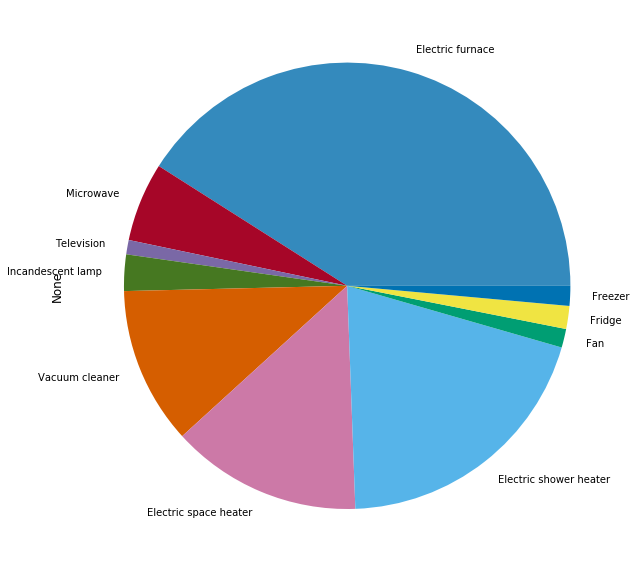

In [97]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

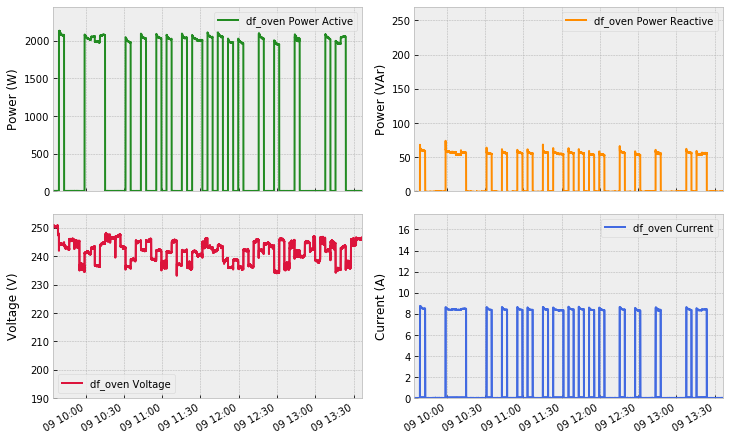

In [98]:


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_oven Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_oven Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_oven Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_oven Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

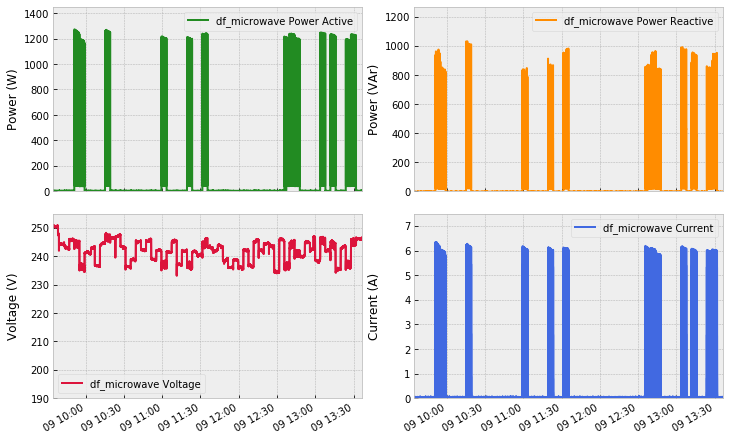

In [99]:


df_mi = next(elec[3].load())#[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microwave Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microwave Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microwave Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microwave Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

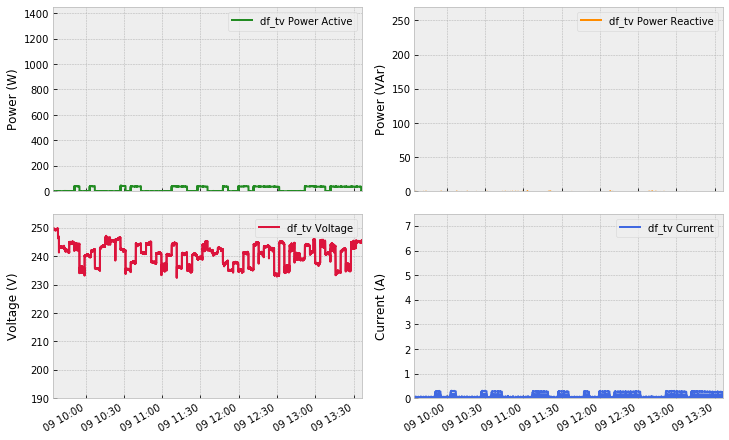

In [100]:


df_tv = next(elec[4].load())#[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Bulb

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

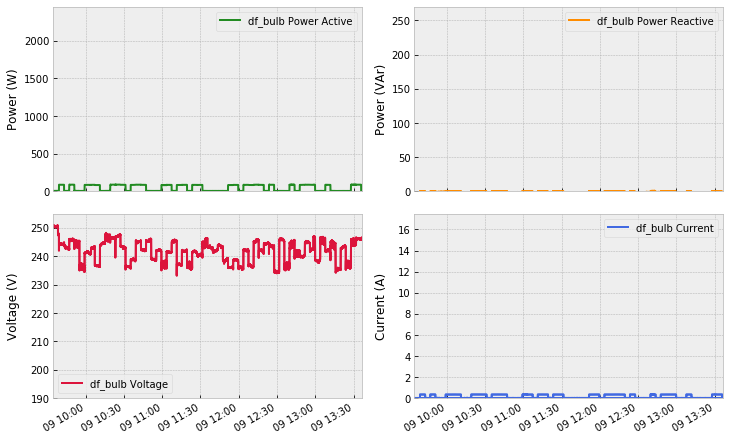

In [101]:

df_bulb = next(elec[5].load())#[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_bulb['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_bulb Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_bulb['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_bulb Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_bulb['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_bulb Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_bulb['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_bulb Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

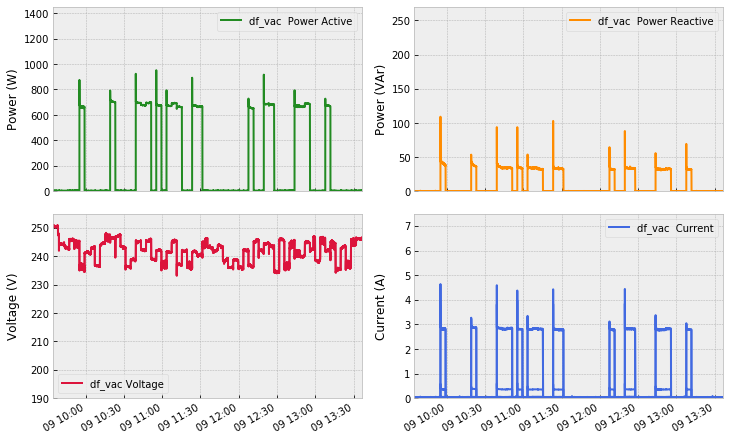

In [102]:



df_vac = next(elec[6].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vac ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vac ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac  Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vac ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vac ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

## Estufa de aceite

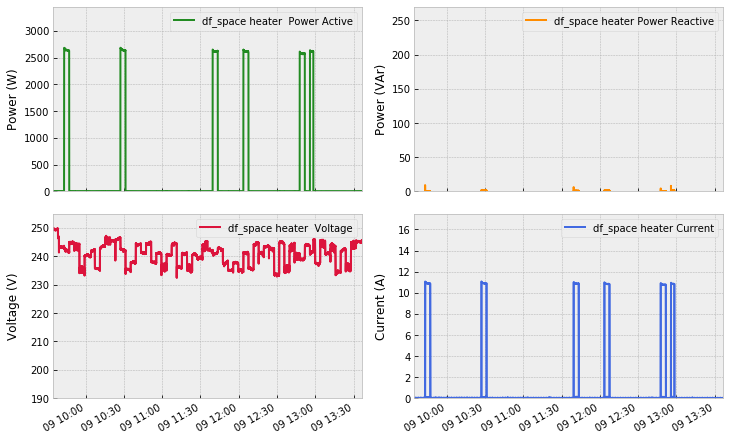

In [103]:


df_sh = next(elec[7].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_space heater  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,3450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_space heater Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_space heater  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_space heater Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

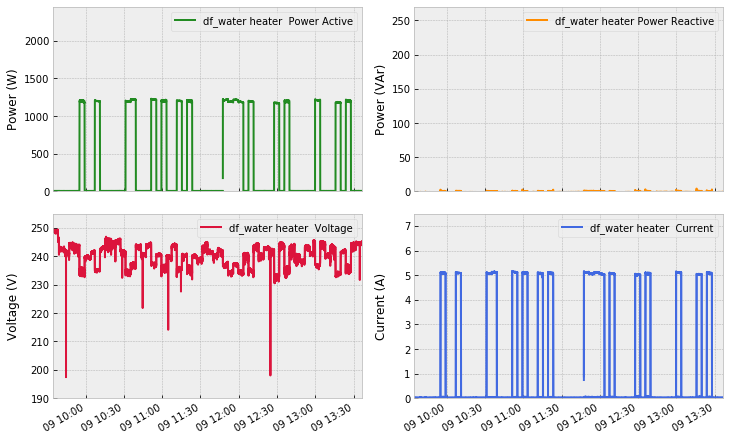

In [104]:


df_sho = next(elec[8].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_water heater  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_water heater Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_water heater  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_water heater  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

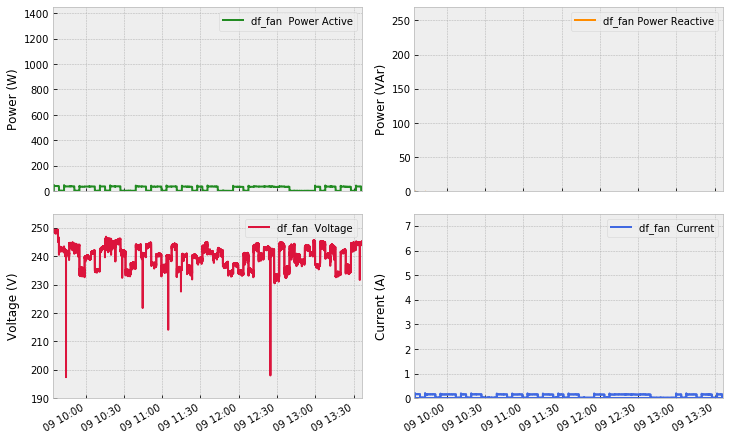

In [105]:


df_fan = next(elec[9].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

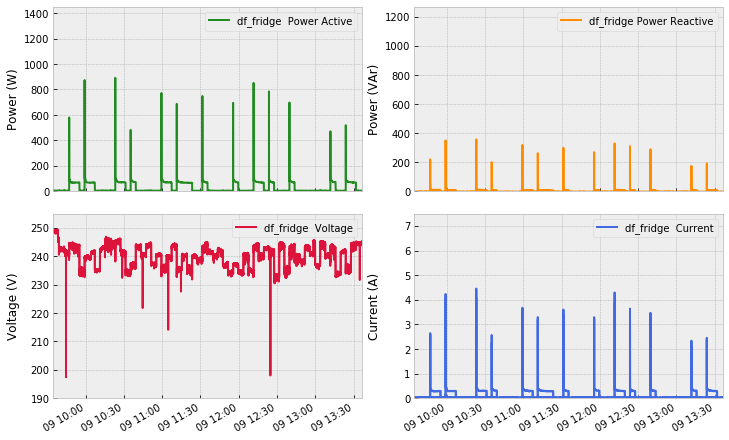

In [106]:



df_fri = next(elec[10].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fridge  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fridge Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fridge  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fridge  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])



ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

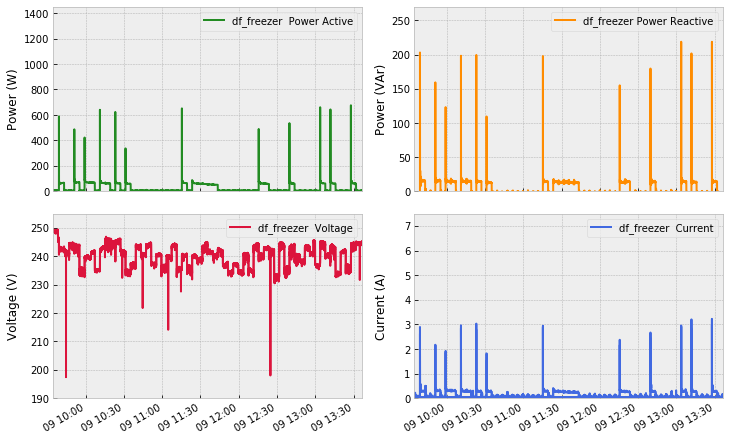

In [107]:


df_fre = next(elec[11].load())#[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])




ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

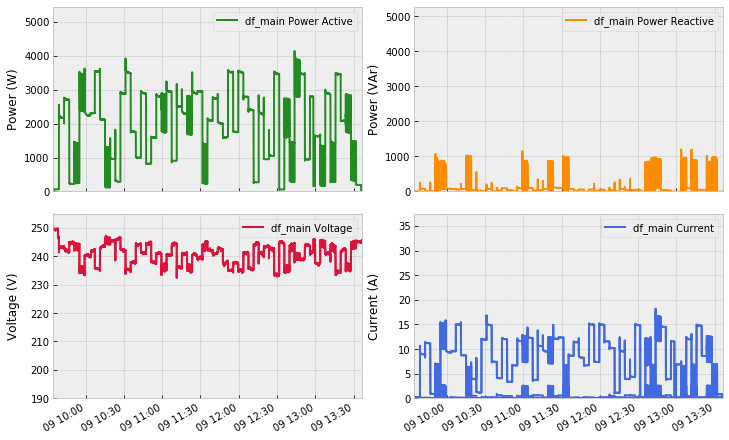

In [108]:


df_main = next(elec[1].load())#[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,5450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,5270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,37.5])



ax1.minorticks_off()

fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_main.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

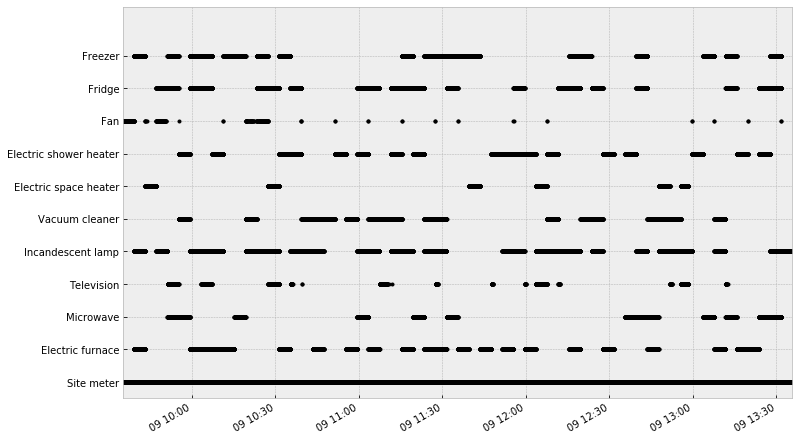

In [109]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

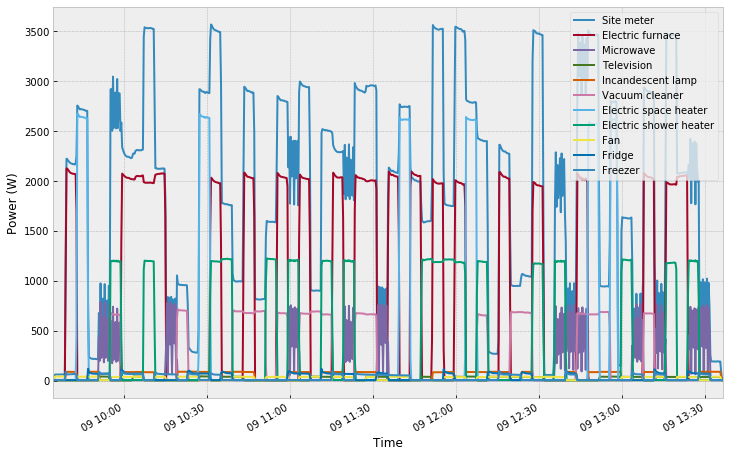

In [110]:
dsualmh.set_window(start='2023-06', end='2023-07')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [111]:
from pandas.plotting import autocorrelation_plot

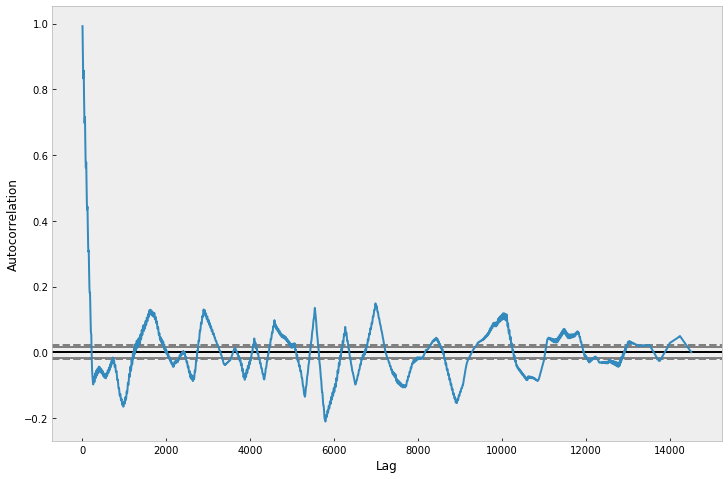

In [112]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [113]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

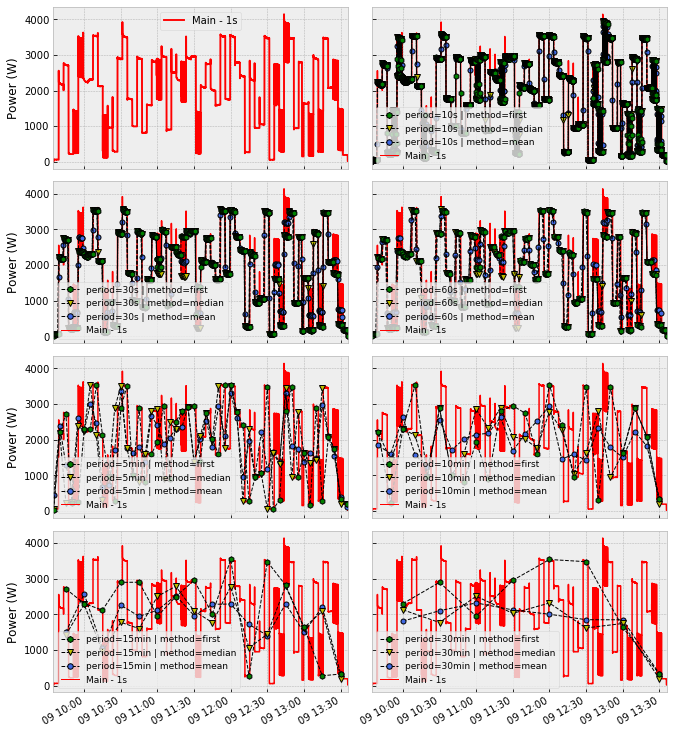

In [114]:
rcParams['figure.figsize'] = (11, 14)


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s.plot(ax=ax,linewidth=1.9,color='r')
        #df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')


ax1.minorticks_off()


#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [115]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

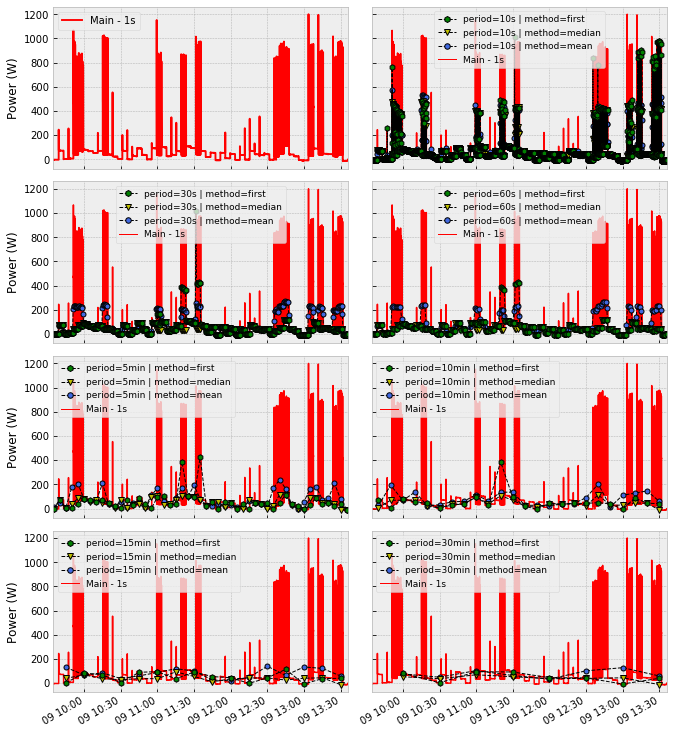

In [116]:
rcParams['figure.figsize'] = (11, 14)



labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        #df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        df_1s.plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

ax1.minorticks_off()

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass